<a href="https://colab.research.google.com/github/pratyushkumarrath/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

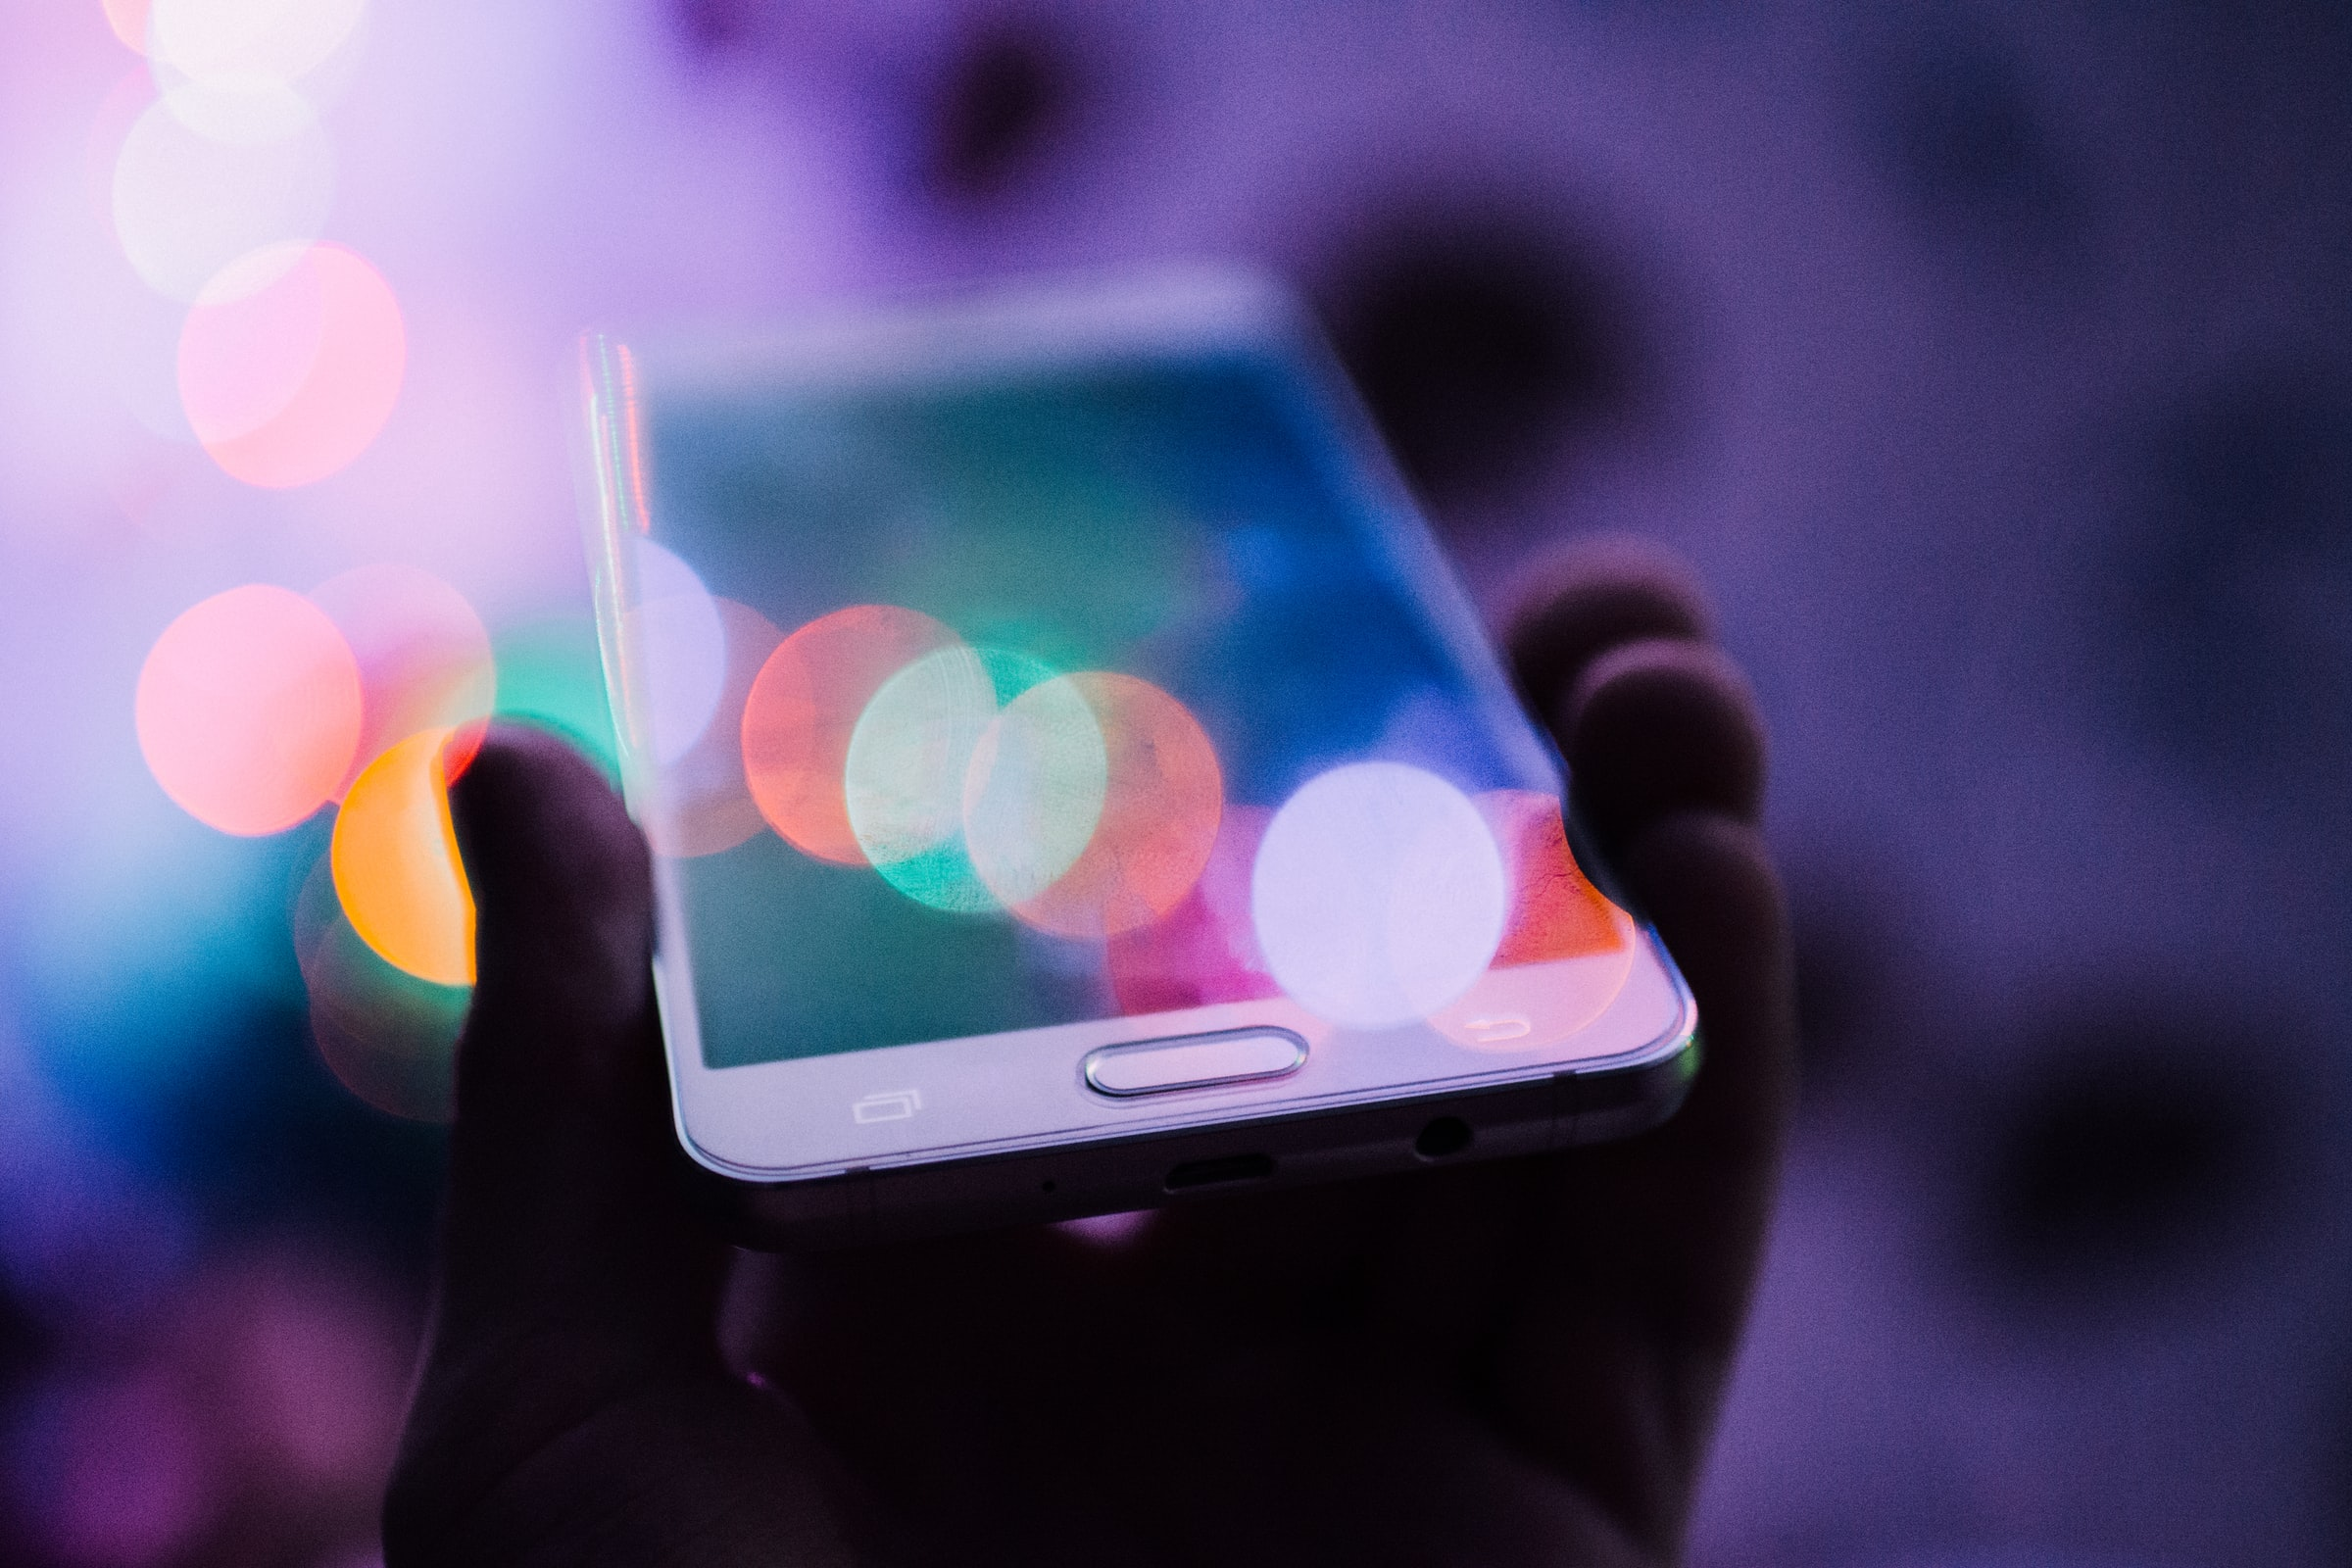

 **Problem Statement:
In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**

**DATA DESCRIPTION**


*  **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not
*   **Clock_speed** - speed at which microprocessor executes instructions
*   **Dual_sim** - Has dual sim support or not
*   **Fc** - Front Camera mega pixels
*  **Four_g** - Has 4G or not
*  **Int_memory** - Internal Memory in Gigabytes
*   **M_dep** - Mobile Depth in cm
*   **Mobile_wt** - Weight of mobile phone
*   **N_cores** - Number of cores of processor
*   **Pc** - Primary Camera mega pixels
*   **Px_height** - Pixel Resolution Height
*   **Px_width** - Pixel Resolution Width
*   **Ram** - Random Access Memory in Mega 
*   **Touch_screen** - Has touch screen or not
*   **Wifi** - Has wifi or not
*  **Sc_h** - Screen Height of mobile in cm
*   **Sc_w** - Screen Width of mobile in cm
*   **Talk_time** - longest time that a single battery charge will last when you are
*   **Three_g** - Has 3G or not
*   **Wifi** - Has wifi or not
*  **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).









**IMPORTING DATASET AND MODULES**

In [1]:
# first we import the modules for implementation
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
Mobile_Price_Predictor=pd.read_csv('/content/data_mobile_price_range.csv',encoding ='latin')

**DEEP DIVE INTO DATA**

In [4]:
#lets see top 10 rows of dataset with transpose
Mobile_Price_Predictor.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
#lets see the no of rows and columns dataset contains
Mobile_Price_Predictor.shape

(2000, 21)

SO BY ABOVE OBSRVATION WE GET TO KNOW THAT IT CONTAINS 2000 ROWS AND 21 COLUMNS.

In [6]:
#lets see last 10 rows of dataset with transpose
Mobile_Price_Predictor.tail(10).T

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


In [7]:
#lets see colums of dataset 
print ("features of the dataset")
Mobile_Price_Predictor.columns

features of the dataset


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
# lets  change the feature names
# changing columns using .columns()
Mobile_Price_Predictor.columns = ['Bettery power', 'Bluetooth', 'CPU Speed', 'Dual Sim', 'Front Camera', '4G', 'ROM', 'Height', 'weight', 'cores', 'Back Camera', 'Pixel Height', 'Pixel width', 'RAM','Screen length','Screen width', 'Talk time','3G','Touch Screen','Wifi','Price Range']

In [9]:
# unique values of every features 
Mobile_Price_Predictor.nunique()

Bettery power    1094
Bluetooth           2
CPU Speed          26
Dual Sim            2
Front Camera       20
4G                  2
ROM                63
Height             10
weight            121
cores               8
Back Camera        21
Pixel Height     1137
Pixel width      1109
RAM              1562
Screen length      15
Screen width       19
Talk time          19
3G                  2
Touch Screen        2
Wifi                2
Price Range         4
dtype: int64

**CHECKING OUT THE MISSING VALUES**

In [10]:
# Checking the datatypes, non null values
Mobile_Price_Predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bettery power  2000 non-null   int64  
 1   Bluetooth      2000 non-null   int64  
 2   CPU Speed      2000 non-null   float64
 3   Dual Sim       2000 non-null   int64  
 4   Front Camera   2000 non-null   int64  
 5   4G             2000 non-null   int64  
 6   ROM            2000 non-null   int64  
 7   Height         2000 non-null   float64
 8   weight         2000 non-null   int64  
 9   cores          2000 non-null   int64  
 10  Back Camera    2000 non-null   int64  
 11  Pixel Height   2000 non-null   int64  
 12  Pixel width    2000 non-null   int64  
 13  RAM            2000 non-null   int64  
 14  Screen length  2000 non-null   int64  
 15  Screen width   2000 non-null   int64  
 16  Talk time      2000 non-null   int64  
 17  3G             2000 non-null   int64  
 18  Touch Sc

**"SO BY ABOVE IMPLEMENTATION WE GET TO KNOW THAT "
"OUR DATASET CONTAINS 2000 ROWS AND 21 COLUMS(FEATURES)" AND THERE IS NO NULL VALUES**

In [11]:
#lets see the description
Mobile_Price_Predictor.describe().T

,count,mean,std,min,25%,50%,75%,max
Bettery power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
Bluetooth,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
CPU Speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
Dual Sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
Front Camera,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
4G,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
ROM,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
Height,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
weight,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0



**So by above observation we get to know that we dont have any object data type and no null vlues in our data set and our dependent variable is Price_range**

**SO NOW FROM HERE OUR EDA(EXPLORATORY DATA ANALYSIS) STARTS**

**Starting with the target variable first.!**

In [12]:
# Dependent Variables Value Counts
Price_Value_Counts=Mobile_Price_Predictor.value_counts('Price Range')
print(Price_Value_Counts)

Price Range
0    500
1    500
2    500
3    500
dtype: int64


***So this is great that we have equal number of obseravtions for each category.So here we don't have any imbalanced Dependent variable.***

***So our target variable values are look like below:***
* ***0=LOW COST,***
* ***1=MEDIUM COST,***
* ***2=HIGH COST,***
* ***3=VERY HIGH COST.***

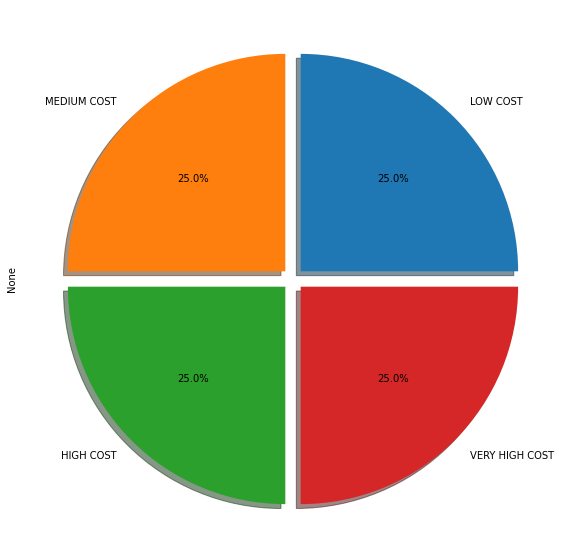

In [13]:
# Visualizing the Target variable's class distribution.
labels = ["LOW COST", "MEDIUM COST", "HIGH COST", "VERY HIGH COST"]
Price_Value_Counts.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',shadow=True,figsize=(12,10),fontsize=10)   

***NOW WE ARE PLOTTING CORRELATION HEATMAP GRAPH TO SEE THE RELATION BETWEEN DEPENDET AND INDEPENDENT VARIABLE***

**INSIGHTS**

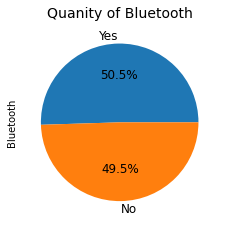

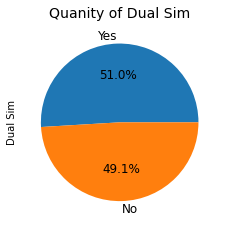

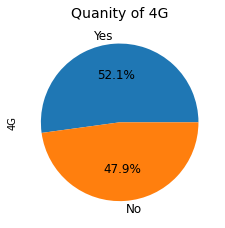

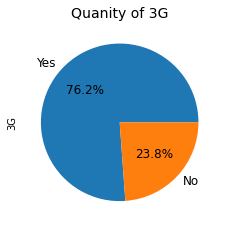

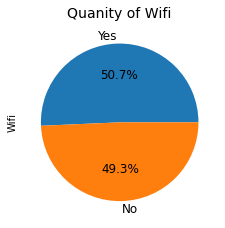

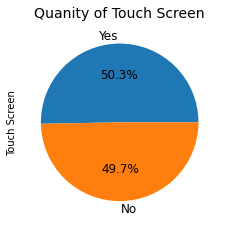

In [14]:
# Plotting the piecharts for categorical variables.
plt.figure(figsize=(15,10))

rows=2
col=3
count=1
var_list=['Bluetooth','Dual Sim','4G','3G','Wifi','Touch Screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  
  Mobile_Price_Predictor[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,figsize=(12,10),labels=labels)
  plt.title(f'Quanity of {var}',fontsize=14)
  plt.show()
  count=count+1

SO BY ABOVE OBSERVATION WE GET TO KNOW THAT FOLLOWING FEATURES ABOVE HAVE ALMOST EQUAL WEIGHTAGE OF PERCENTAGE THAT IT PRESENT IN A PARTICULAR MOBILE OR NOT.BUT SOME FEATURES HAVE HIGH WEIGHTAGE IN THE MOBILES.

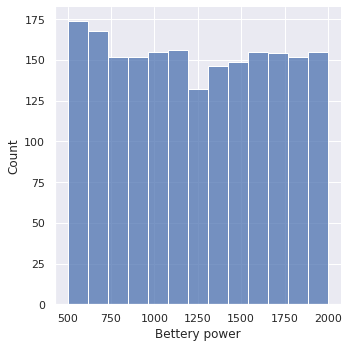

In [15]:
# plotting displot for battery power
sns.set(rc={'figure.figsize':(15,15)})
ax=sns.displot(Mobile_Price_Predictor["Bettery power"])
plt.show()

Text(0.5, 0, 'MegaPixels')

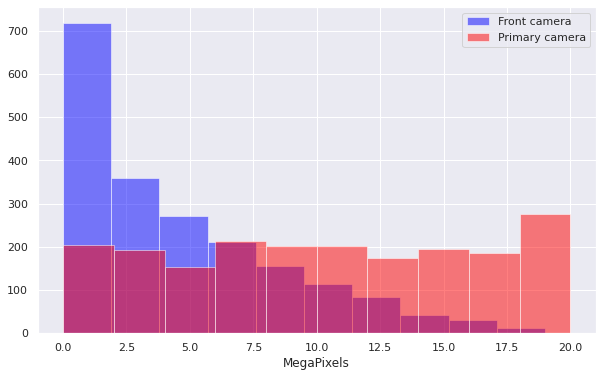

In [16]:
# LETS PERFORM ANALYSIS ON PRICE RANGE VS MEGAPIXEL
plt.figure(figsize=(10,6))
Mobile_Price_Predictor['Front Camera'].hist(alpha=0.5,color='blue',label='Front camera')
Mobile_Price_Predictor['Back Camera'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

SO BY ABOBE MEGAPIXELES GRAPH WE GET TO KNOW THAT MEGAPIXEL HEIGHT ABOVE 700 AND MEGAPIXEL WIDTH ABOVE 1300 FALLS UNDER VERY HIGH COST CATEGORY.

[Text(0.5, 1.0, 'PRICE OF MOBILE AFFCTED BY BATTERY POWER')]

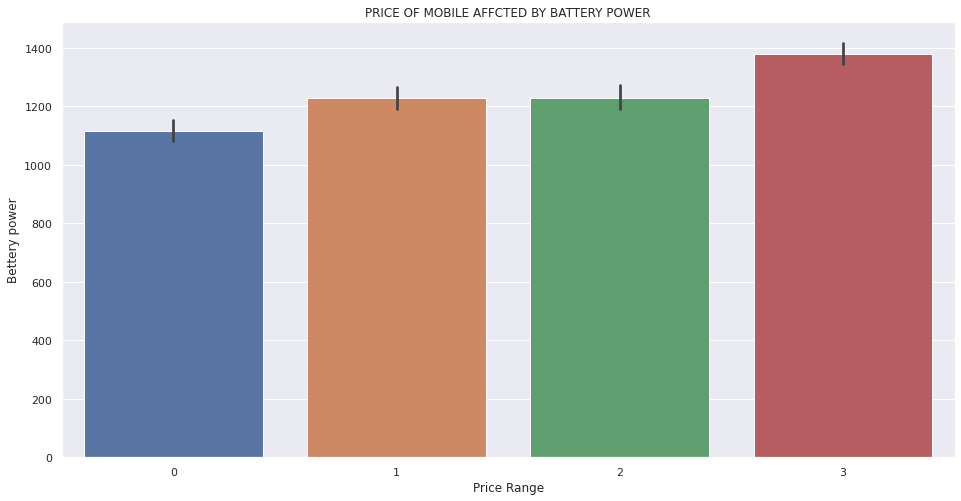

In [17]:
# LETS PERFORM ANALYSIS ON PRICE RANGE VS BATTERY POWER
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=Mobile_Price_Predictor,x='Price Range',y='Bettery power')
ax.set(title='PRICE OF MOBILE AFFCTED BY BATTERY POWER')

SO MOBILE HAVING MORE THAN 1300 MAH BATTERY POWER ARE COMES UNDER VERY HIGH COST CATEGORY.

[Text(0.5, 1.0, 'PRICE OF MOBILE AFFCTED BY RAM')]

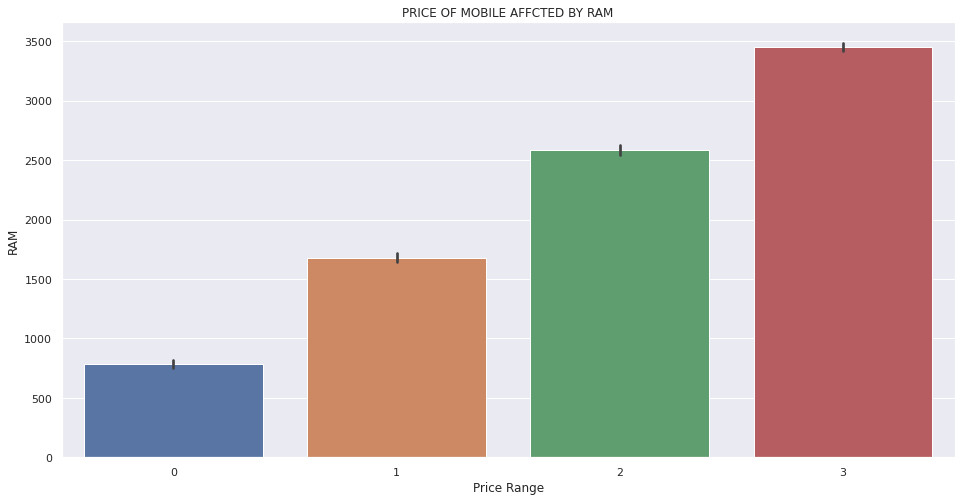

In [18]:
# LETS PERFORM ANALYSIS ON PRICE RANGE VS RAM
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=Mobile_Price_Predictor,x='Price Range',y='RAM')
ax.set(title='PRICE OF MOBILE AFFCTED BY RAM')

SO BY ABOVE GRAPH WE GET TO KNOW THAT RAM RANGES FROM ABOVE 2600 THAT MOBILES COME UNDER VERY HIGH COST CATEGORY.

In [19]:
# Checking the counts of binary categorical variables by grouping price range.
price_ranges=Mobile_Price_Predictor.groupby(['Price Range']).agg({'Bluetooth':'value_counts','Dual Sim':'value_counts','4G':'value_counts','3G':'value_counts','Touch Screen':'value_counts','Wifi':'value_counts'}).unstack()

Bluetooth      Dual Sim        4G        3G      Touch Screen  \
                    0    1        0    1    0    1    0    1            0   
Price Range                                                                 
0                 257  243      250  250  241  259  127  373          238   
1                 255  245      245  255  238  262  122  378          239   
2                 257  243      251  249  253  247  113  387          265   
3                 241  259      235  265  225  275  115  385          252   

                 Wifi       
               1    0    1  
Price Range                 
0            262  252  248  
1            261  248  252  
2            235  248  252  
3            248  238  262

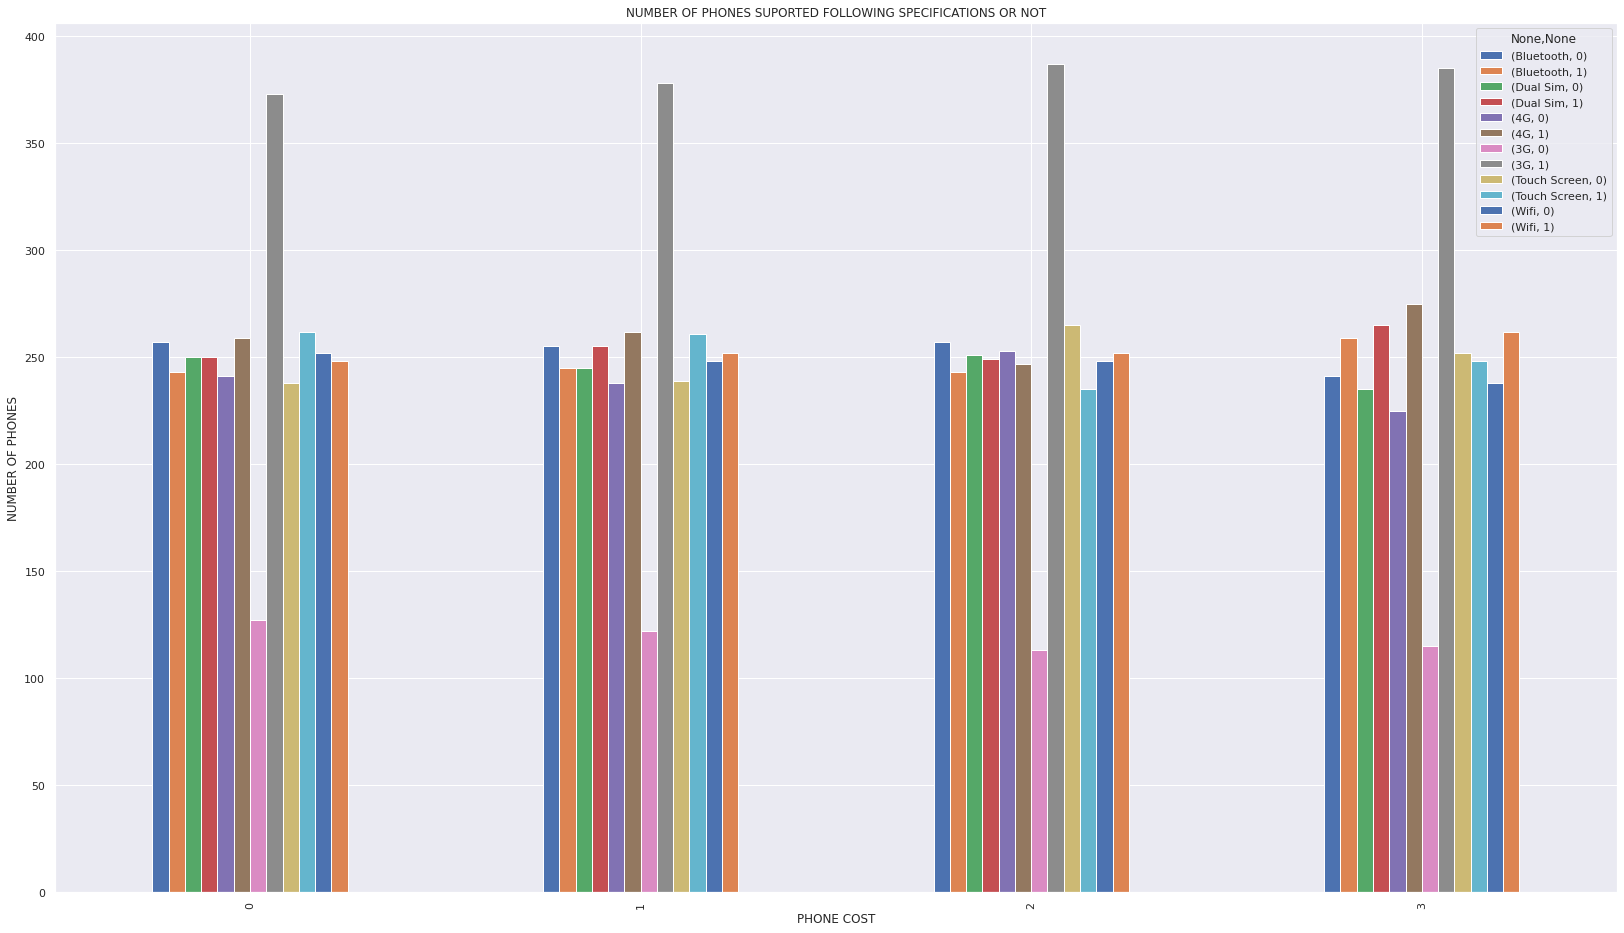

In [20]:
# plotting barplot to know that how much price get affected by following features
price_ranges.plot.bar(figsize=(28,16))
plt.title('NUMBER OF PHONES SUPORTED FOLLOWING SPECIFICATIONS OR NOT')
plt.xlabel('PHONE COST')
plt.ylabel('NUMBER OF PHONES')
price_ranges

**SO BY ABOVE OBSERVATION WE FIND THAT EVERY PRICE CATEGORY HAVE ALMOST EQUAL NUMBER OF PHONES HAVE FEATURES OR NOT**

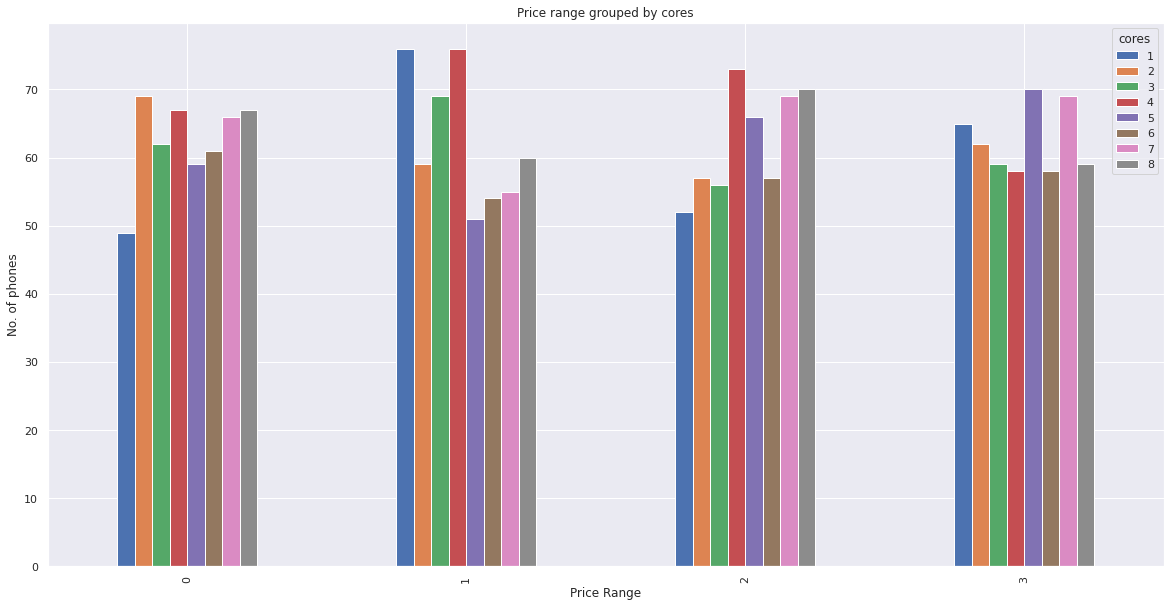

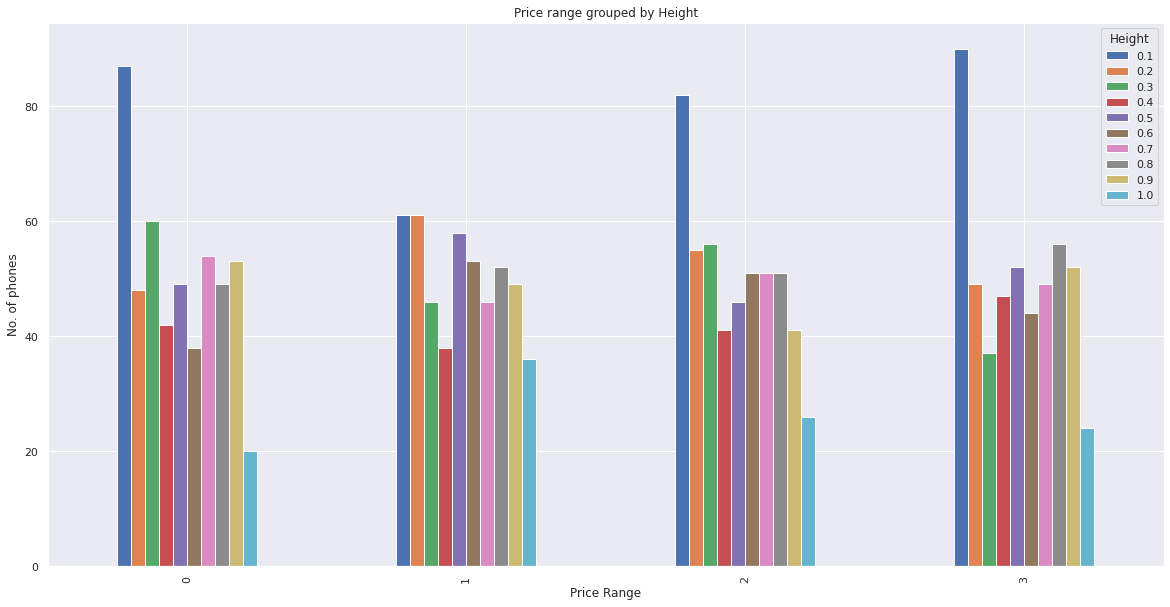

In [21]:
specs=['cores','Height']
for item in specs:
  
  Mobile_Price_Predictor.groupby(['Price Range'])[item].value_counts().unstack().plot.bar(figsize=(20,10))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

SO BY ABOVE GRAPHS WE CAN CLEARLY SAY THAT LESS THICK PHONES ARE HIGH COMPARING TO HIGH THCKNESS AND MAXIMUMUM MOBILES IN PRICE RANGE 2 & 3 HAVE MORE NO OF CORES.

**3G AND 4G**

In [22]:
# Mobiles have both 3G and 4G specifications.
three_four_gen=Mobile_Price_Predictor[(Mobile_Price_Predictor['3G']==1) & (Mobile_Price_Predictor['4G']==1)]

In [23]:
three_four_gen['Price Range'].value_counts()

3    275
1    262
0    259
2    247
Name: Price Range, dtype: int64

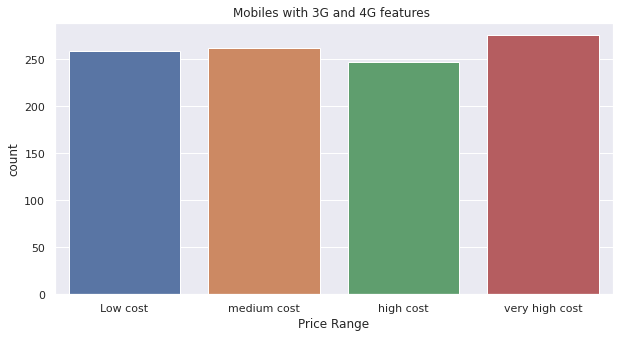

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(three_four_gen['Price Range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

* FROM ABOVE GRAPH WE CAN CLEARELY SAY THAT FROM LOW TO HIGH PRICE RANGE MOBILES HAVE BOTH 3G AND 4G COMPATIBILITY.

** PLOTTING GRAPH TO UNDERSTAND THE BLUETOOTH FEATURE**

Text(0.5, 1.0, 'BLUETOOTH IMPACT ON PRICE ')

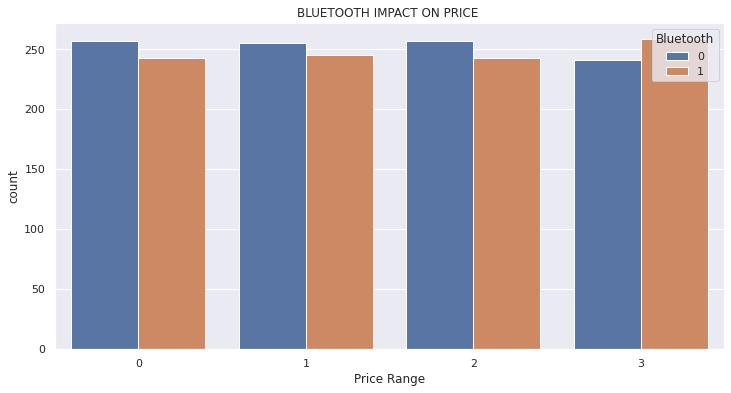

In [25]:
# PRICE WITH BLUETTOTH FEATURES
plt.figure(figsize=(12, 6))
sns.countplot(Mobile_Price_Predictor['Price Range'],hue=Mobile_Price_Predictor['Bluetooth'])
plt.title("BLUETOOTH IMPACT ON PRICE ")


# **NUMERICAL FEATURES**

In [26]:
Mobile_Price_Predictor.columns

Index(['Bettery power', 'Bluetooth', 'CPU Speed', 'Dual Sim', 'Front Camera',
       '4G', 'ROM', 'Height', 'weight', 'cores', 'Back Camera', 'Pixel Height',
       'Pixel width', 'RAM', 'Screen length', 'Screen width', 'Talk time',
       '3G', 'Touch Screen', 'Wifi', 'Price Range'],
      dtype='object')

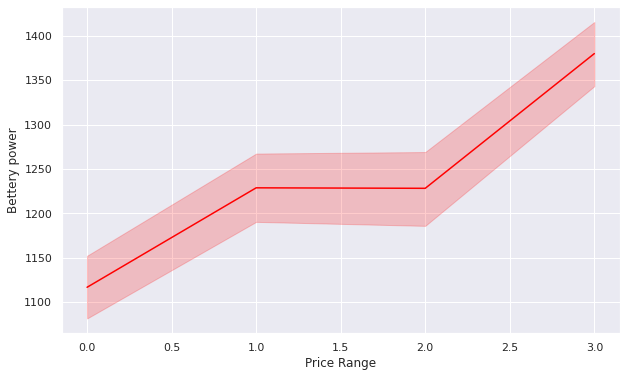

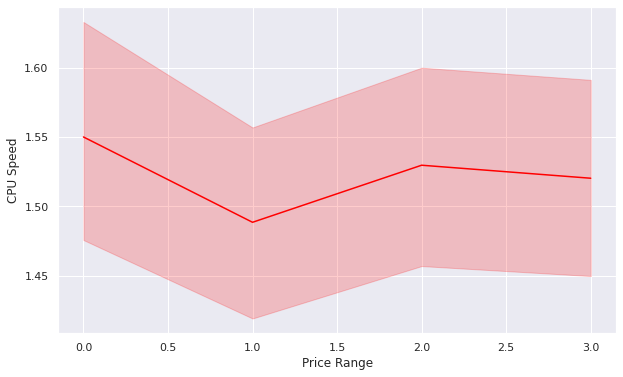

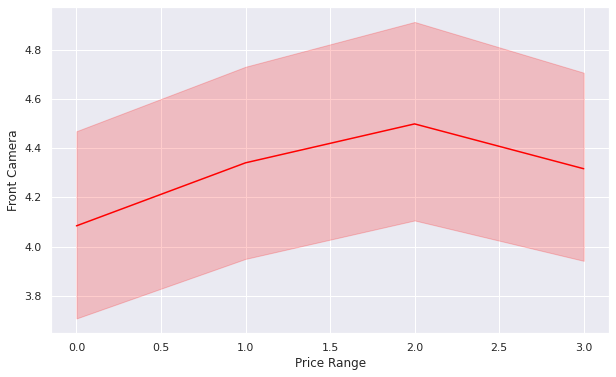

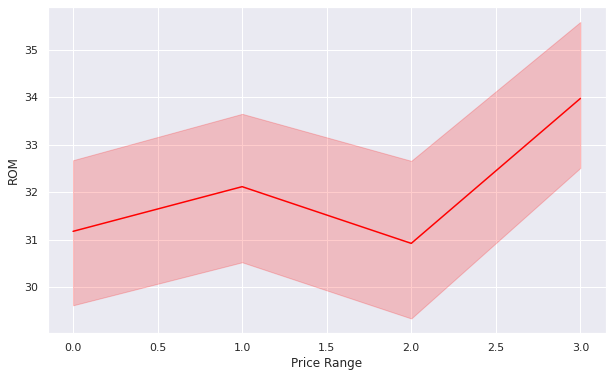

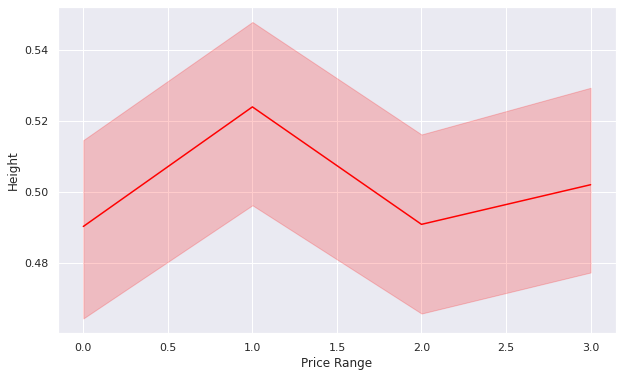

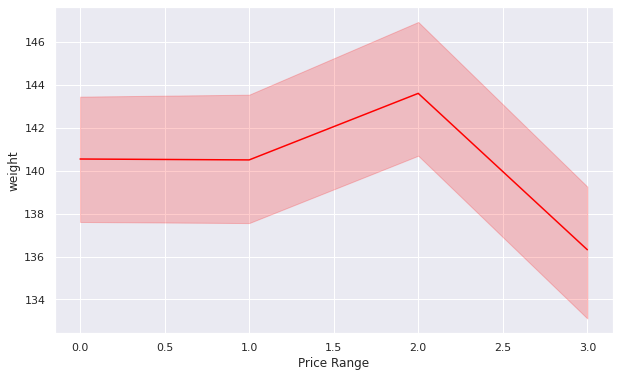

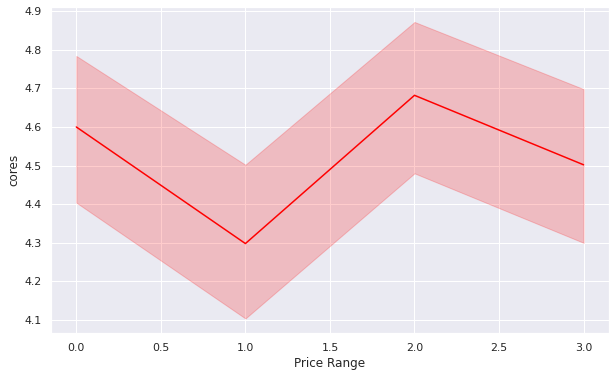

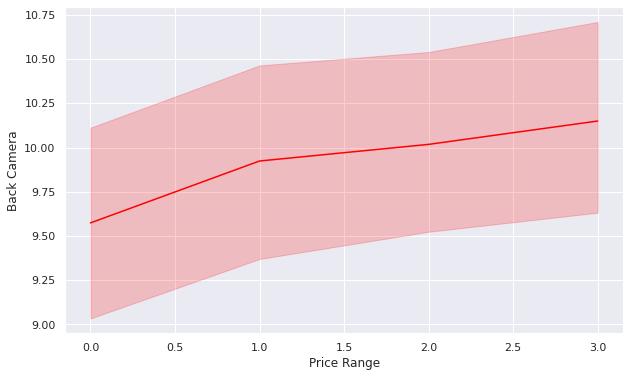

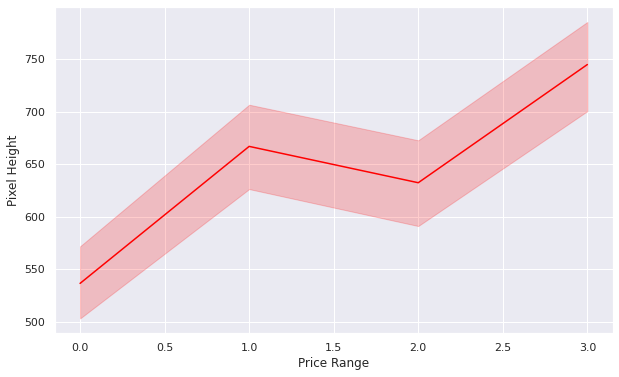

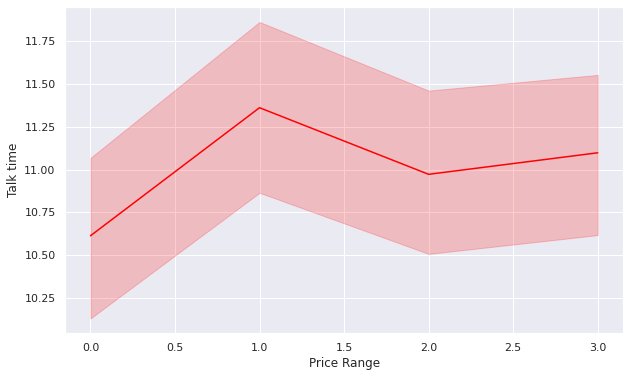

In [27]:
# numerical distribution
num_list=['Bettery power','CPU Speed','Front Camera','ROM','Height','weight','cores','Back Camera','Pixel Height','Talk time']
counter=1
for cal in num_list:
    plt.figure(figsize=(10,6))
    sns.lineplot(x=Mobile_Price_Predictor['Price Range'],y=Mobile_Price_Predictor[cal],color="red")

### **INSIGHTS**



*   RAM SHOWS A DIRECT CONNECTION TO PRICE AS RAM SIZE INCREASES PRICE ALSO INCREASES
*   HERE WE OBSERVE THAT FOR PRICE RANGE 0 & 1 BATTERY POWER IS QUITE SIMILAR

*   WEIGHT OF PHONE IS INVERSELY PROPORTIONAL TO PRICE
*   MEGAPIXEL, SCREEN SIZE,IS DIRECTLY PROPORTIONAL TO PRICE







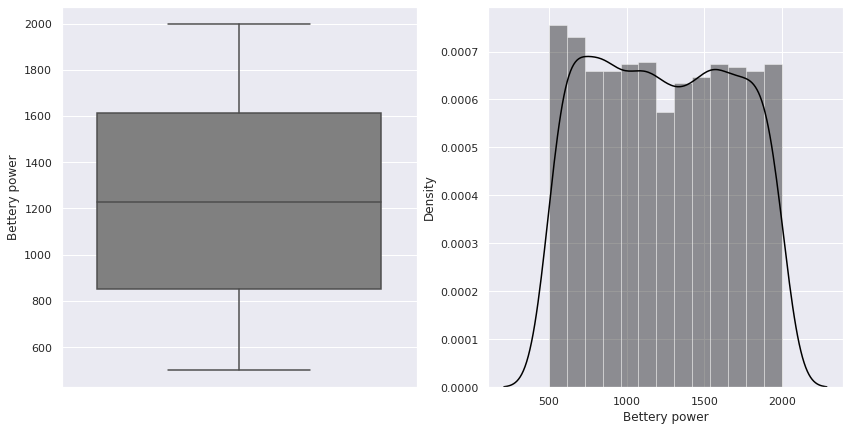

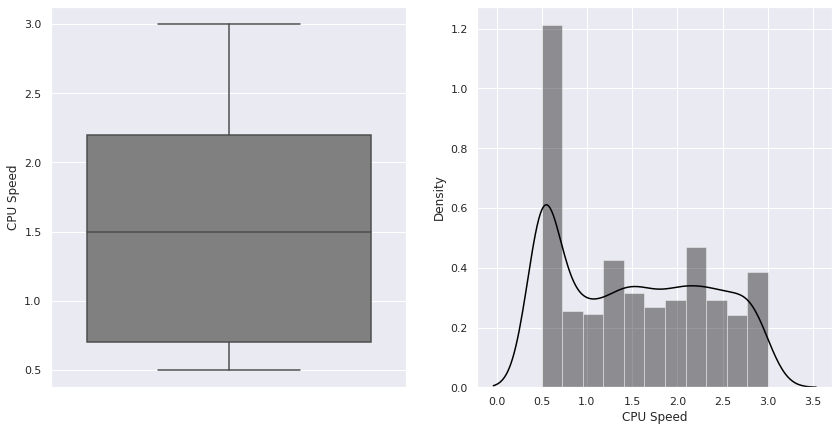

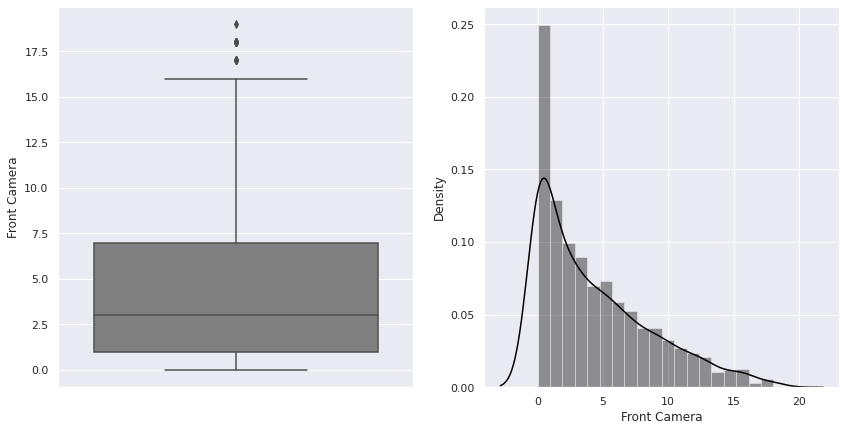

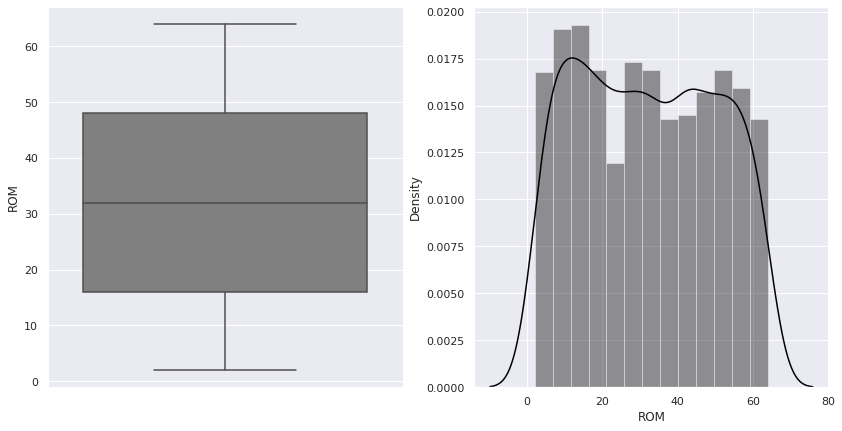

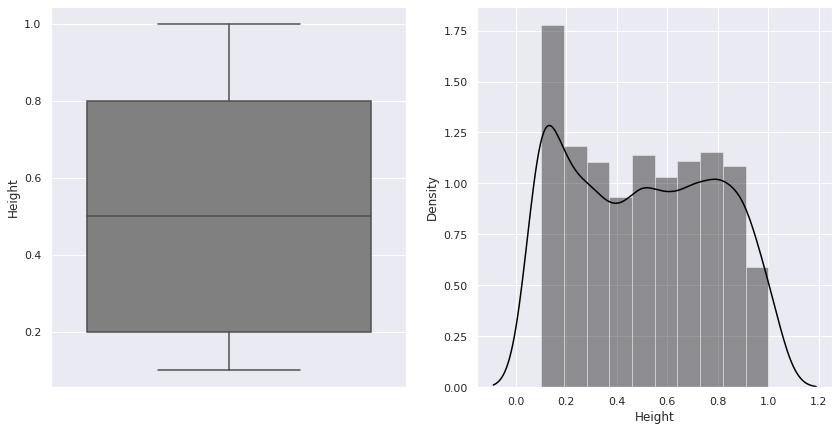

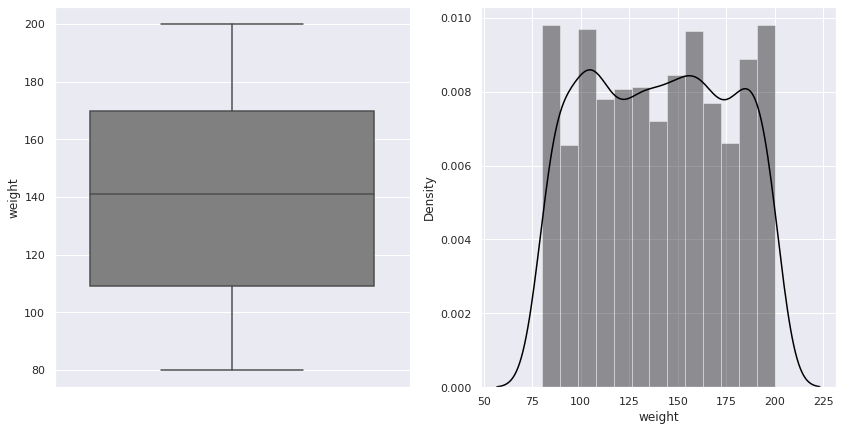

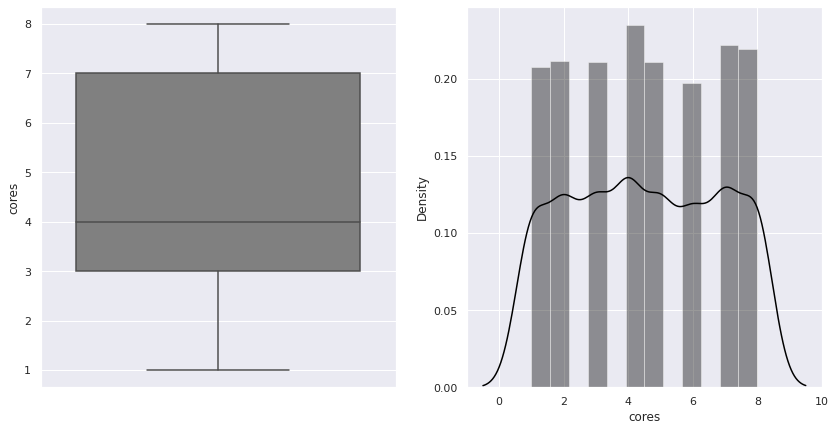

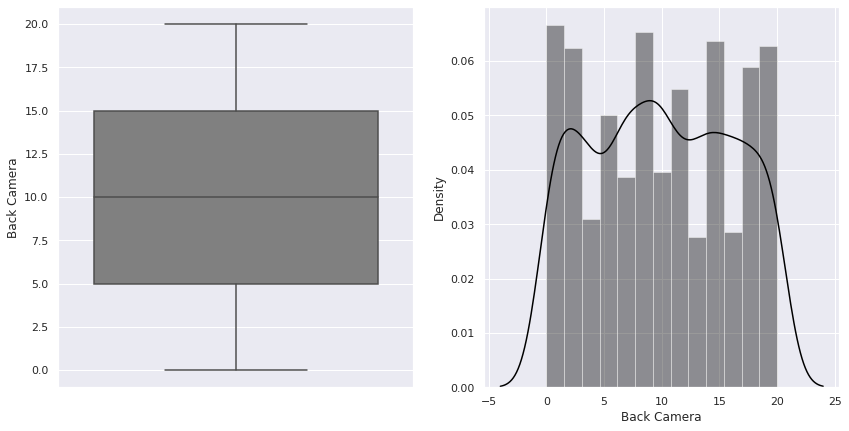

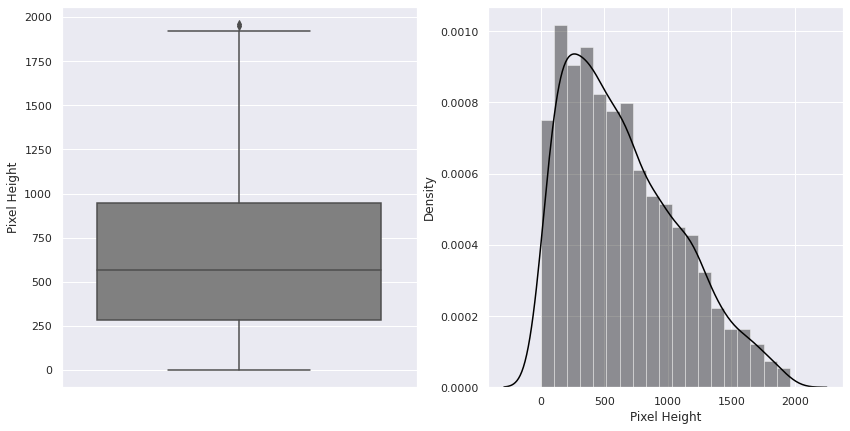

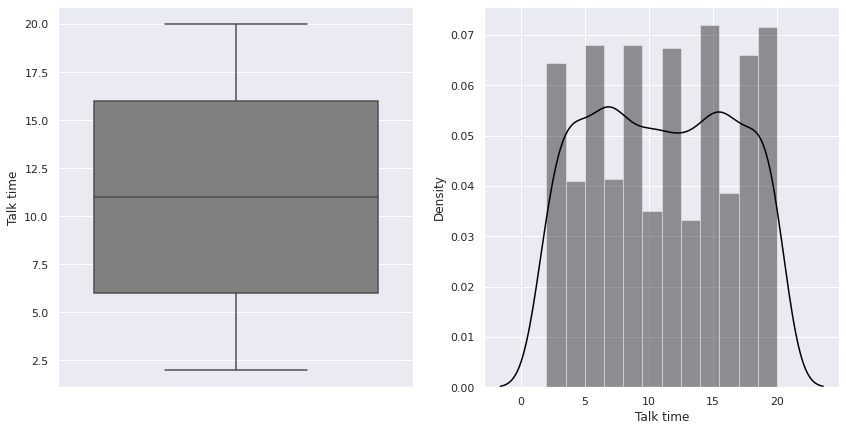

In [28]:
# distribution of numerical columns.
for num in num_list:
    plt.figure(figsize=(14,7))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=Mobile_Price_Predictor[num],color='grey')
    fig.set_title('')
    fig.set_ylabel(num)
    plt.subplot(1, 2, 2)
    fig = sns.distplot(Mobile_Price_Predictor[num],color='black')
    fig.set_xlabel(num)
    plt.show()

SO WHILE SEEING THE ABOVE DISTRIBUTION WE CAN CLEARLY SAY THAT OUR DATA IS VERY WELL DISTIBUTED

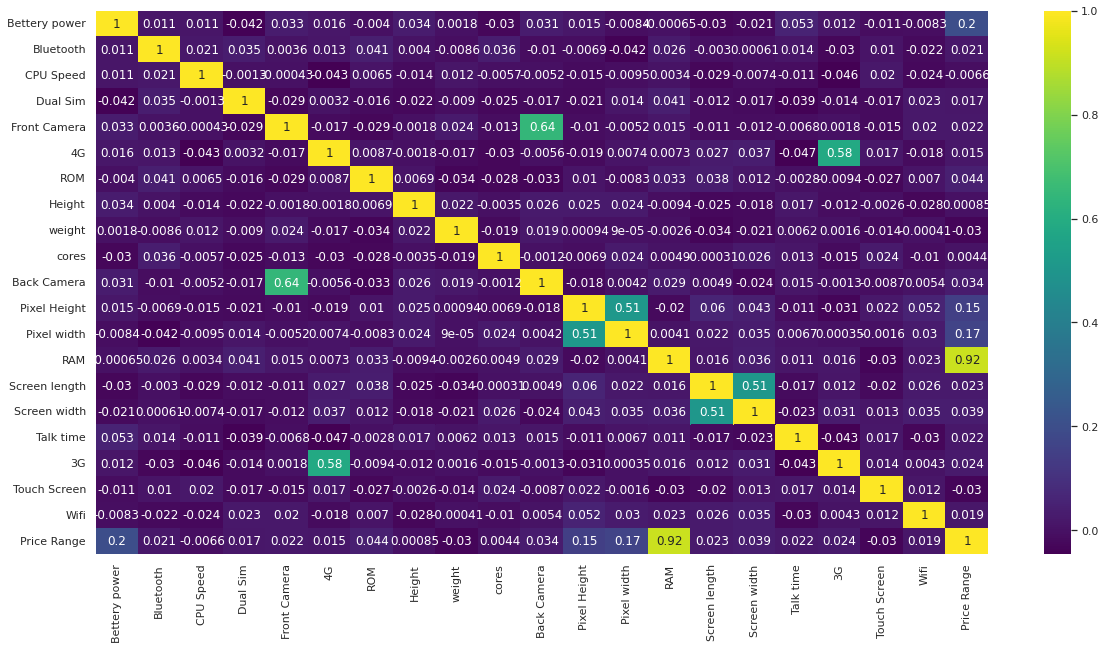

In [29]:
# plotting the correlation heatmap graph
# plt.figure(figsize=(15,8))
# plt.figure(figsize=(20,8))
# correlation = Mobile_Price_Predictor.corr()
# sns.heatmap(abs(correlation), annot=True, cmap="YlGnBu")

fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(Mobile_Price_Predictor.corr(), cmap='viridis', annot=True)

SO WHAT WE OBSERVE BY ABOVE CORRELATION GRAPH IS:

POSITIVELY CORRELATED-



*   primary camera and front camera
*   sc_h and sc_w
*   4G AND 3G
*   px_height and px_width
*   ram and battery power with price











* Here we also can see that there is very less correlation between price range with CPU cores, CPU speed and height of the Mobile. So we can drop these features so as to get better results in this model.

In [30]:
Mobile_Price_Predictor.drop(['cores','Height','CPU Speed'],axis=1, inplace = True)

In [31]:
Mobile_Price_Predictor['Screen Area'] = Mobile_Price_Predictor['Screen length'] * Mobile_Price_Predictor['Screen width']
Mobile_Price_Predictor.drop(['Screen width','Screen length'],axis=1, inplace = True)
Mobile_Price_Predictor.head()

,Bettery power,Bluetooth,Dual Sim,Front Camera,4G,ROM,weight,Back Camera,Pixel Height,Pixel width,RAM,Talk time,3G,Touch Screen,Wifi,Price Range,Screen Area
0,842,0,0,1,0,7,188,2,20,756,2549,19,0,0,1,1,63
1,1021,1,1,0,1,53,136,6,905,1988,2631,7,1,1,0,2,51
2,563,1,1,2,1,41,145,6,1263,1716,2603,9,1,1,0,2,22
3,615,1,0,0,0,10,131,9,1216,1786,2769,11,1,0,0,2,128
4,1821,1,0,13,1,44,141,14,1208,1212,1411,15,1,1,0,1,16


In [32]:
# Train test split
Y = Mobile_Price_Predictor['Price Range']
X = Mobile_Price_Predictor.drop(columns=['Price Range'], axis=1)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)

# standardizing the independent variables
from sklearn.preprocessing import MaxAbsScaler
scaler =MaxAbsScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(1600, 16)
(400, 16)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score, recall_score, f1_score , roc_auc_score , roc_curve

LOGISTIC REGRESSION
------------------------
Model performance for training set
Accuracy:  0.9344 
F1 score:  0.9335 
Precision:  0.9340 
Recall:  0.9344 
 
Confusion Matrix:
[[405   3   0   0]
 [ 20 363  20   0]
 [  0  30 334  27]
 [  0   0   5 393]]


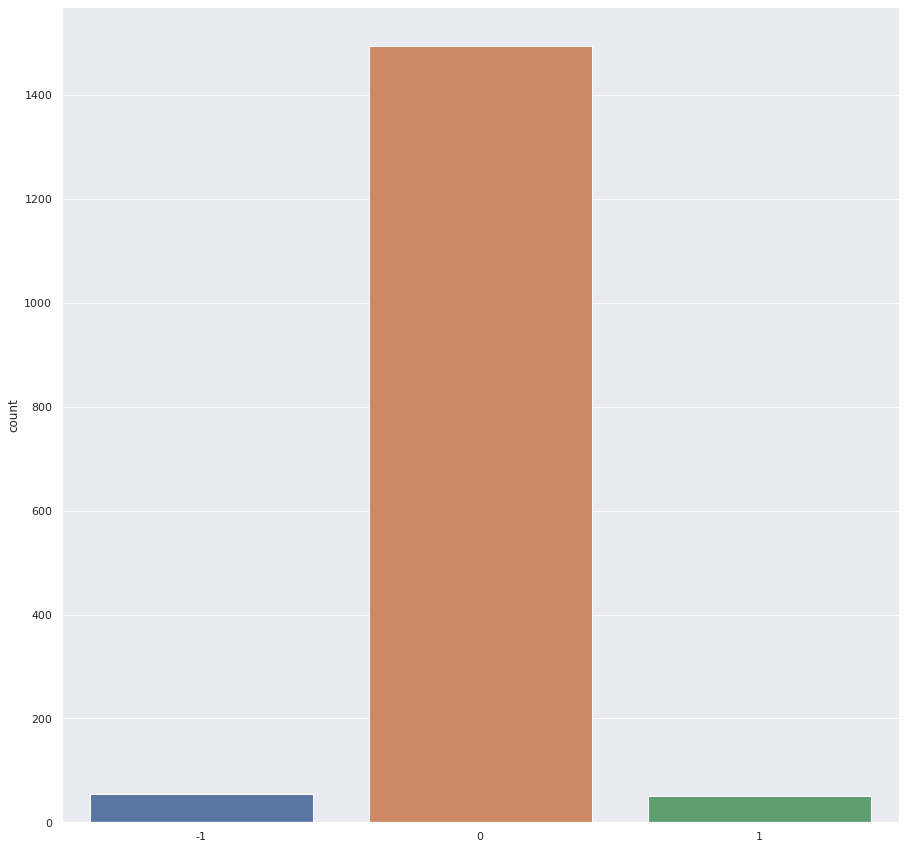

 
 
Model performance for test set
Accuracy:  0.9075 
F1 score:  0.9061 
Precision:  0.9092 
Recall:  0.9075 
 
Confusion Matrix:
[[ 92   0   0   0]
 [ 11  83   3   0]
 [  0  15  88   6]
 [  0   0   2 100]]


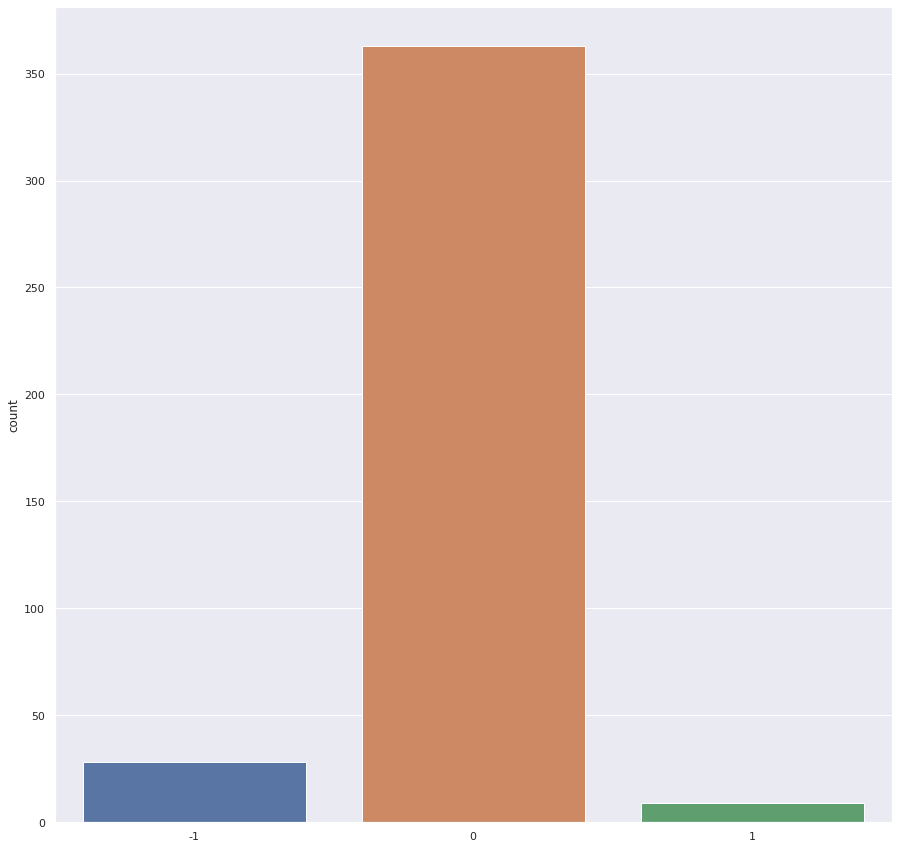

 
***********************************
 
DESCISION TREE
------------------------
Model performance for training set
Accuracy:  1.0000 
F1 score:  1.0000 
Precision:  1.0000 
Recall:  1.0000 
 
Confusion Matrix:
[[408   0   0   0]
 [  0 403   0   0]
 [  0   0 391   0]
 [  0   0   0 398]]


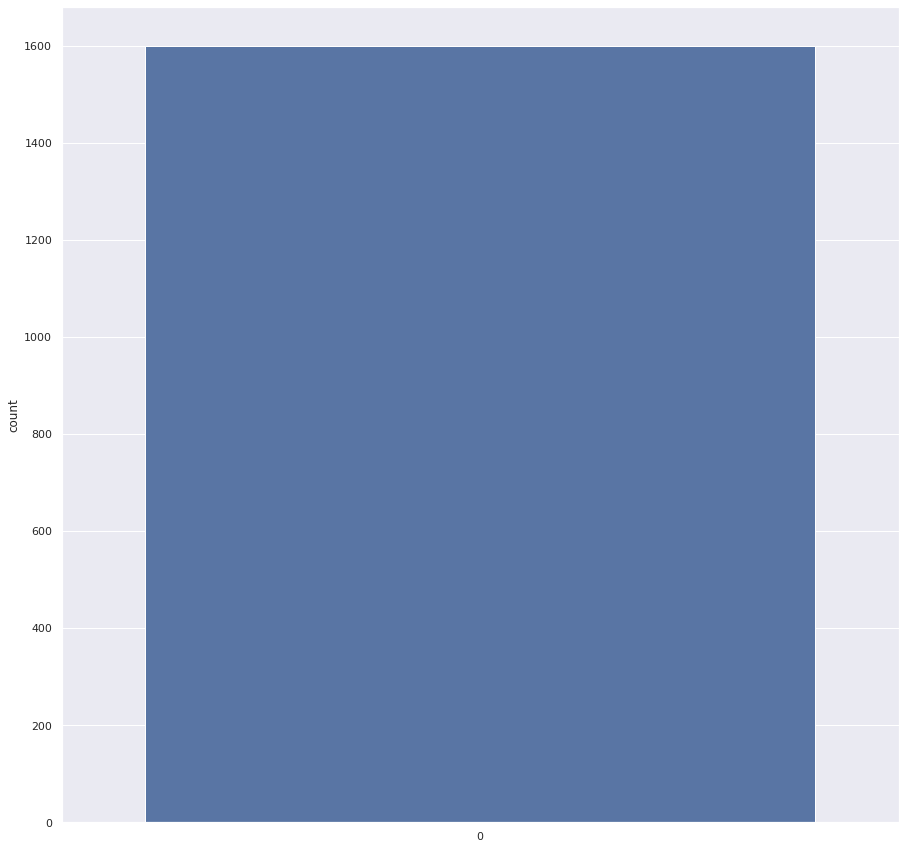

 
 
Model performance for test set
Accuracy:  0.8350 
F1 score:  0.8347 
Precision:  0.8457 
Recall:  0.8350 
 
Confusion Matrix:
[[79 13  0  0]
 [ 7 85  4  1]
 [ 0 23 75 11]
 [ 0  0  7 95]]


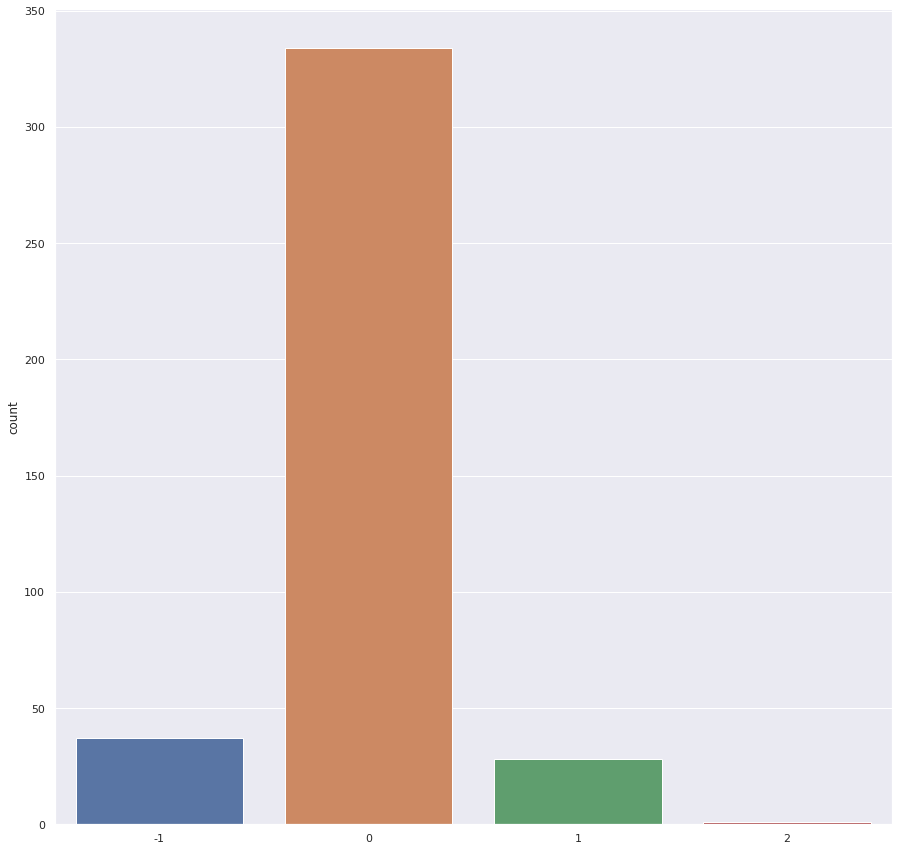

 
***********************************
 
RANDOMFOREST
------------------------
Model performance for training set
Accuracy:  1.0000 
F1 score:  1.0000 
Precision:  1.0000 
Recall:  1.0000 
 
Confusion Matrix:
[[408   0   0   0]
 [  0 403   0   0]
 [  0   0 391   0]
 [  0   0   0 398]]


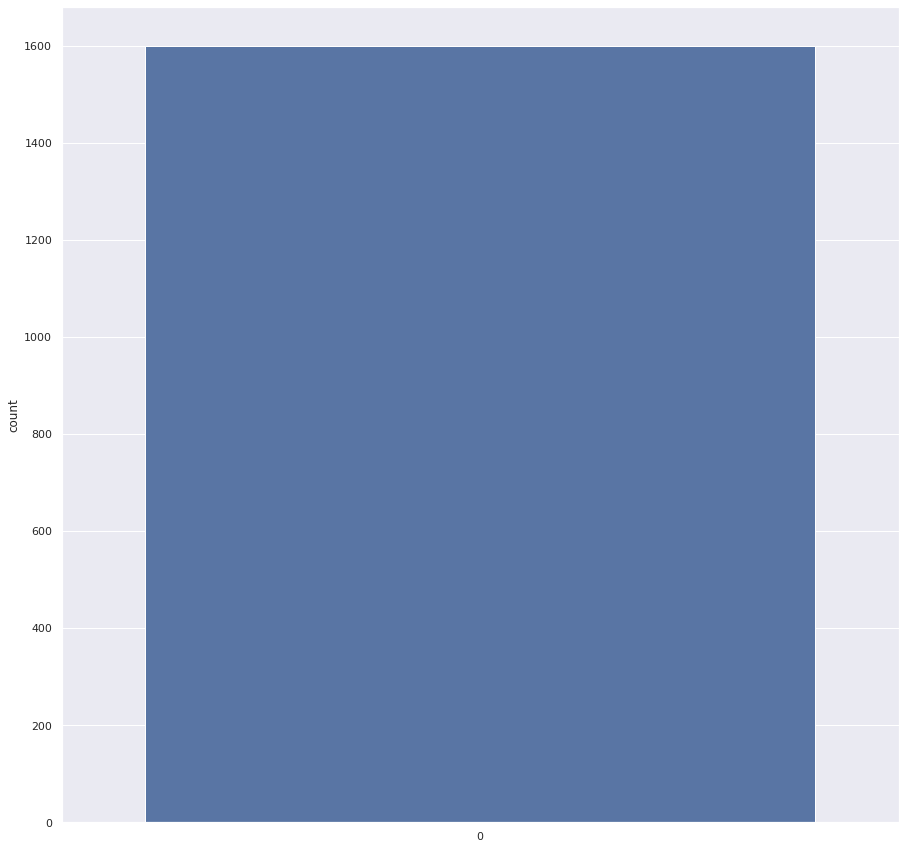

 
 
Model performance for test set
Accuracy:  0.9000 
F1 score:  0.9002 
Precision:  0.9017 
Recall:  0.9000 
 
Confusion Matrix:
[[87  5  0  0]
 [ 6 86  5  0]
 [ 0 14 91  4]
 [ 0  0  6 96]]


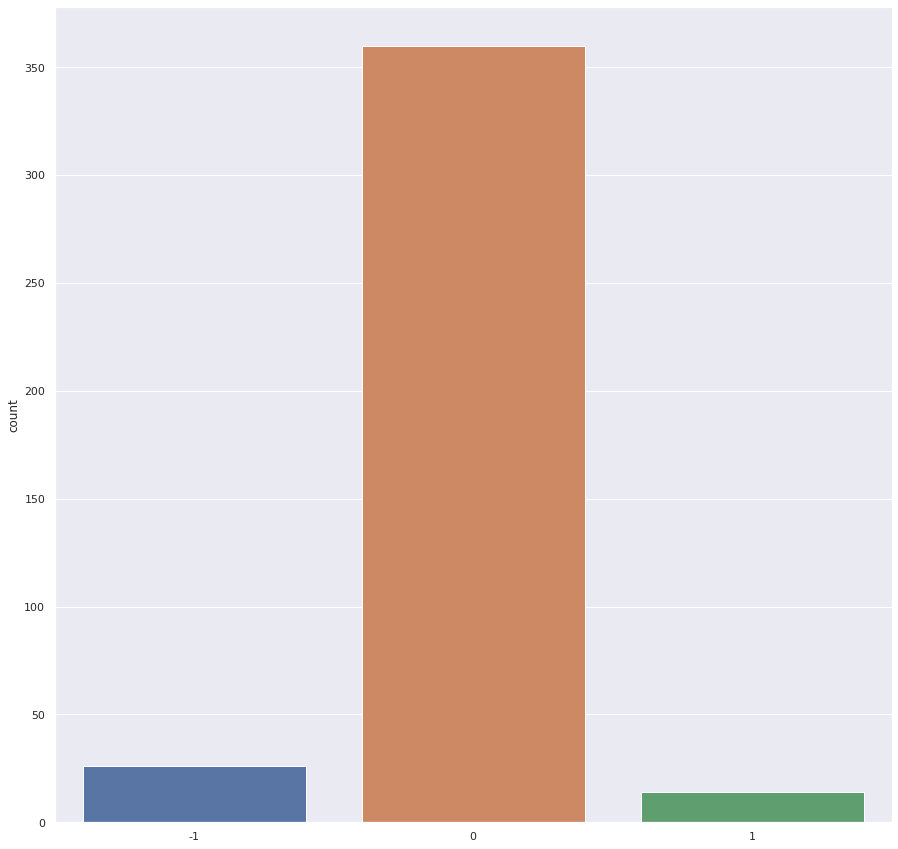

 
***********************************
 
KNN CLASSIFIER
------------------------
Model performance for training set
Accuracy:  0.6475 
F1 score:  0.6486 
Precision:  0.6627 
Recall:  0.6475 
 
Confusion Matrix:
[[330  64  12   2]
 [125 229  41   8]
 [ 31  93 233  34]
 [  4  55  95 244]]


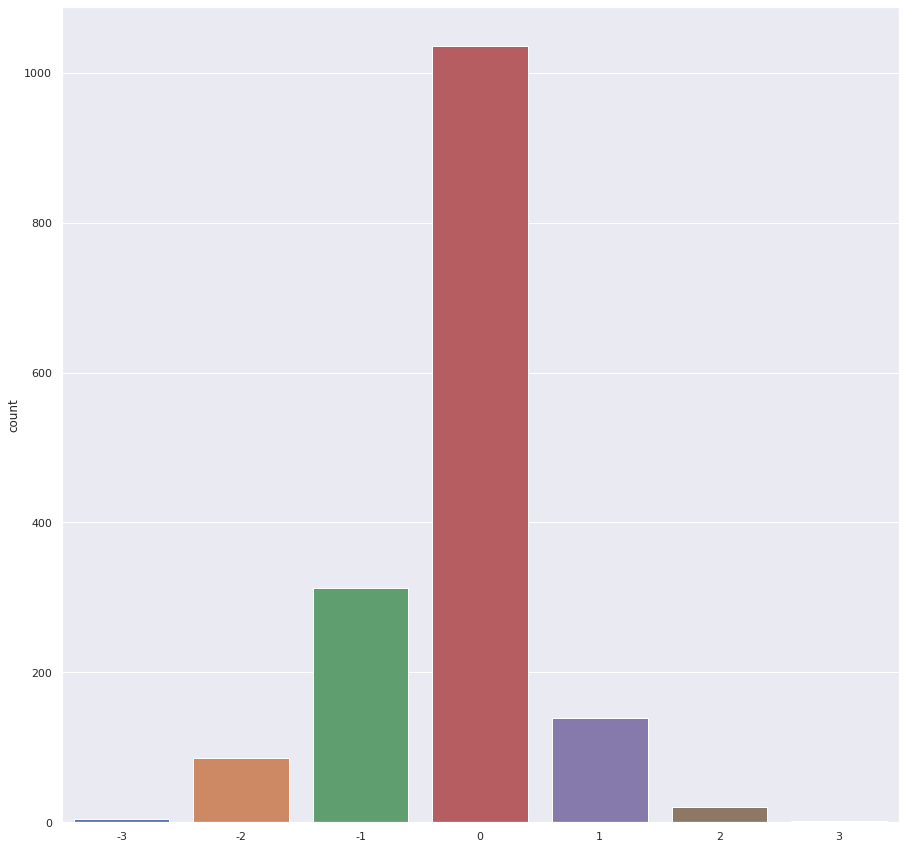

 
 
Model performance for test set
Accuracy:  0.4350 
F1 score:  0.4375 
Precision:  0.4773 
Recall:  0.4350 
 
Confusion Matrix:
[[59 23 10  0]
 [35 37 21  4]
 [18 39 42 10]
 [ 1 25 40 36]]


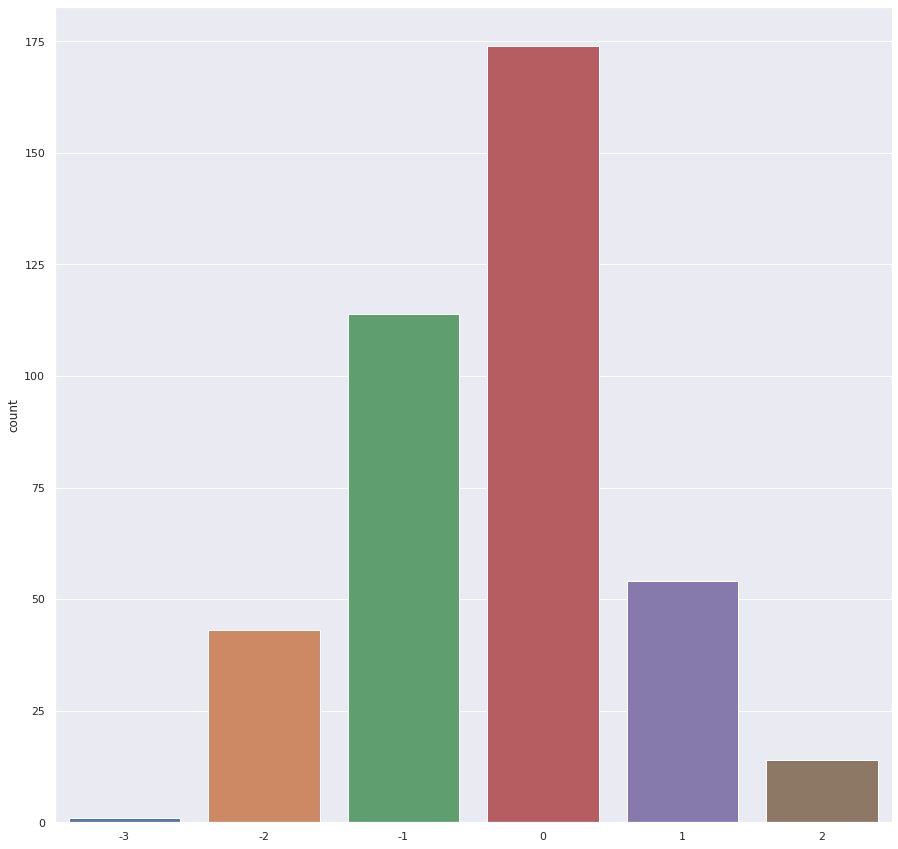

 
***********************************
 
NAIVE BAYES
------------------------
Model performance for training set
Accuracy:  0.8131 
F1 score:  0.8137 
Precision:  0.8145 
Recall:  0.8131 
 
Confusion Matrix:
[[372  35   1   0]
 [ 33 292  78   0]
 [  0  75 281  35]
 [  0   1  41 356]]


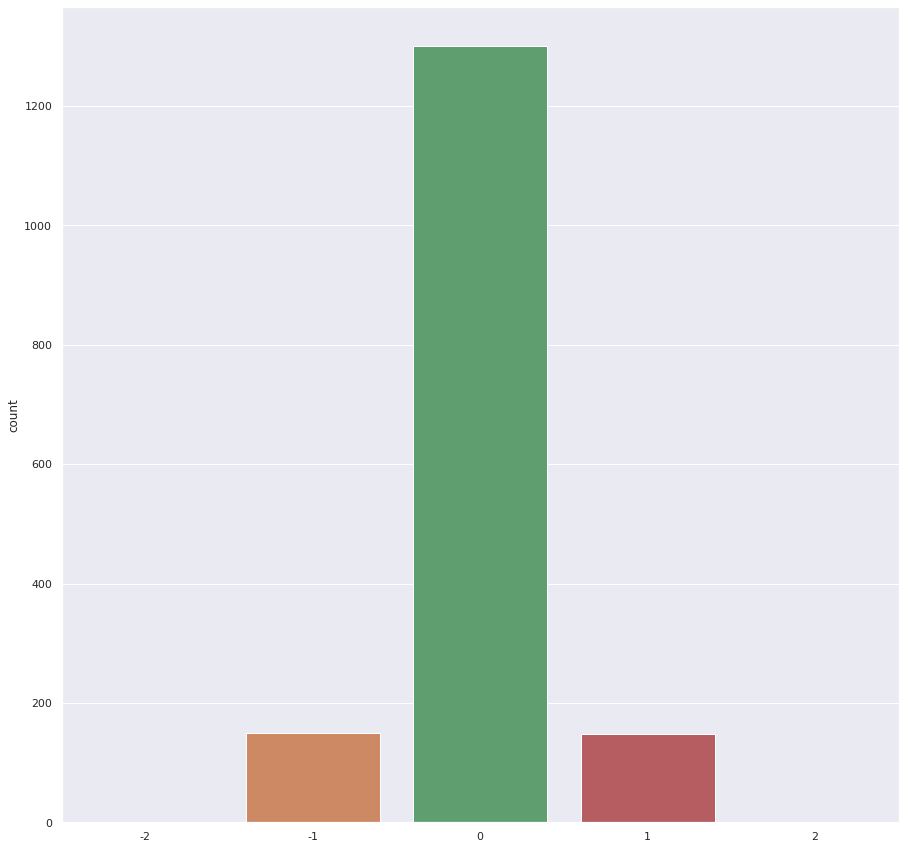

 
 
Model performance for test set
Accuracy:  0.8050 
F1 score:  0.8052 
Precision:  0.8069 
Recall:  0.8050 
 
Confusion Matrix:
[[80 12  0  0]
 [ 8 68 21  0]
 [ 0 25 76  8]
 [ 0  0  4 98]]


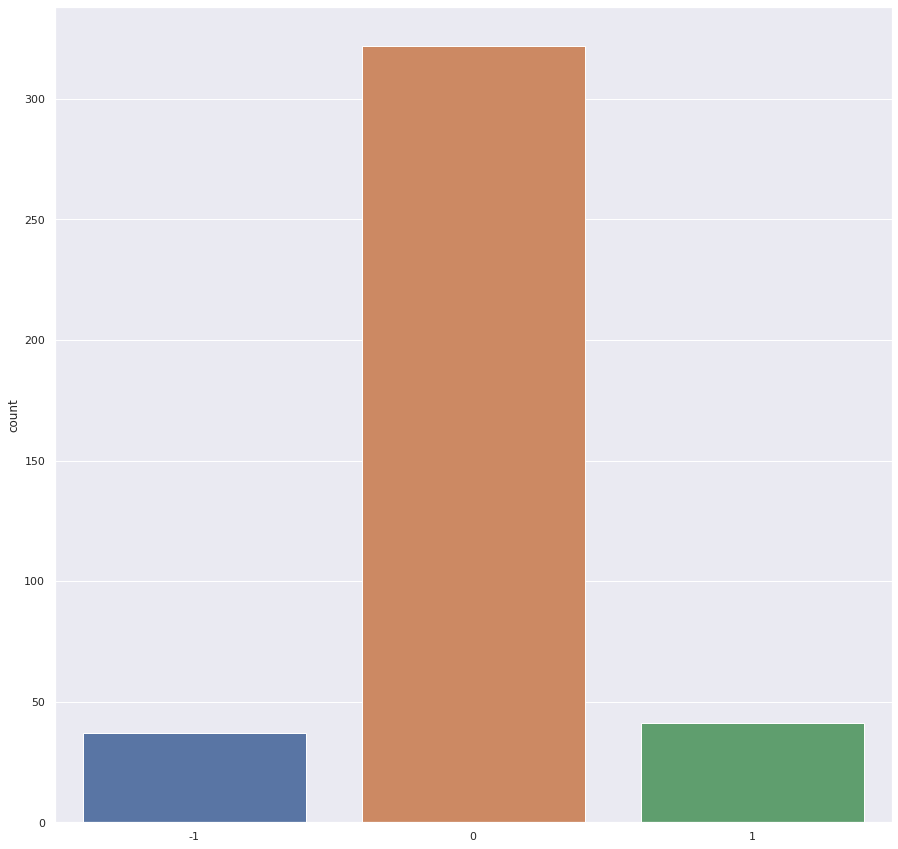

 
***********************************
 
SUPPORT VECTOR MACHINE
------------------------
Model performance for training set
Accuracy:  0.9506 
F1 score:  0.9506 
Precision:  0.9507 
Recall:  0.9506 
 
Confusion Matrix:
[[399   9   0   0]
 [ 10 383  10   0]
 [  0  20 359  12]
 [  0   0  18 380]]


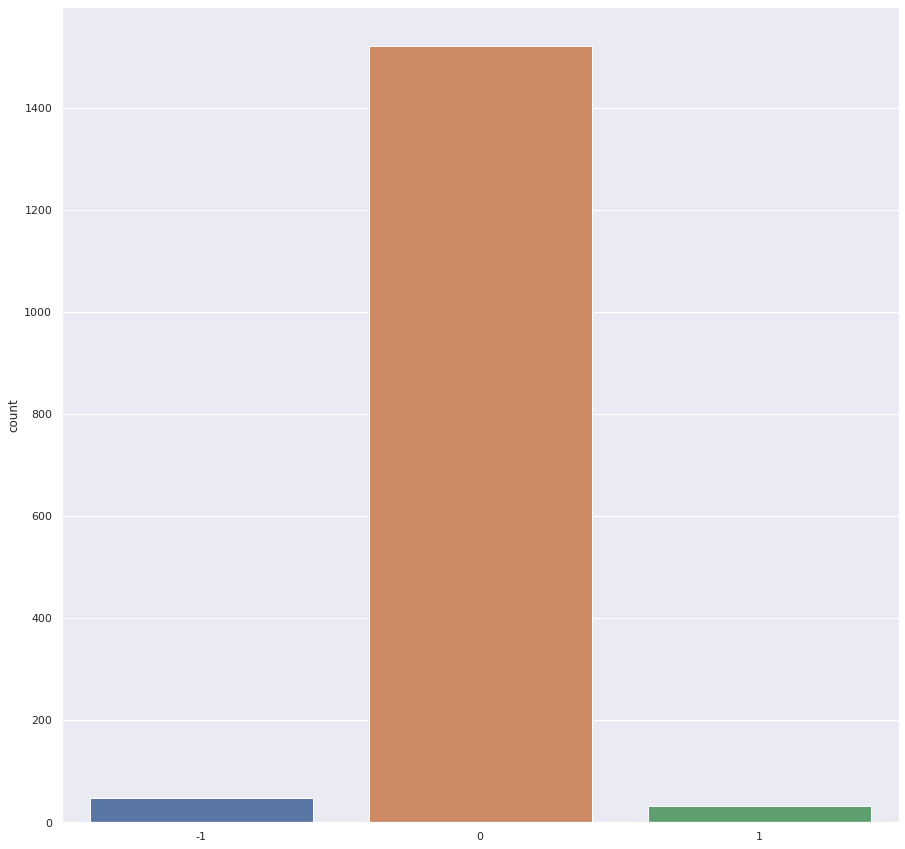

 
 
Model performance for test set
Accuracy:  0.8325 
F1 score:  0.8319 
Precision:  0.8316 
Recall:  0.8325 
 
Confusion Matrix:
[[86  6  0  0]
 [10 75 12  0]
 [ 0 14 83 12]
 [ 0  0 13 89]]


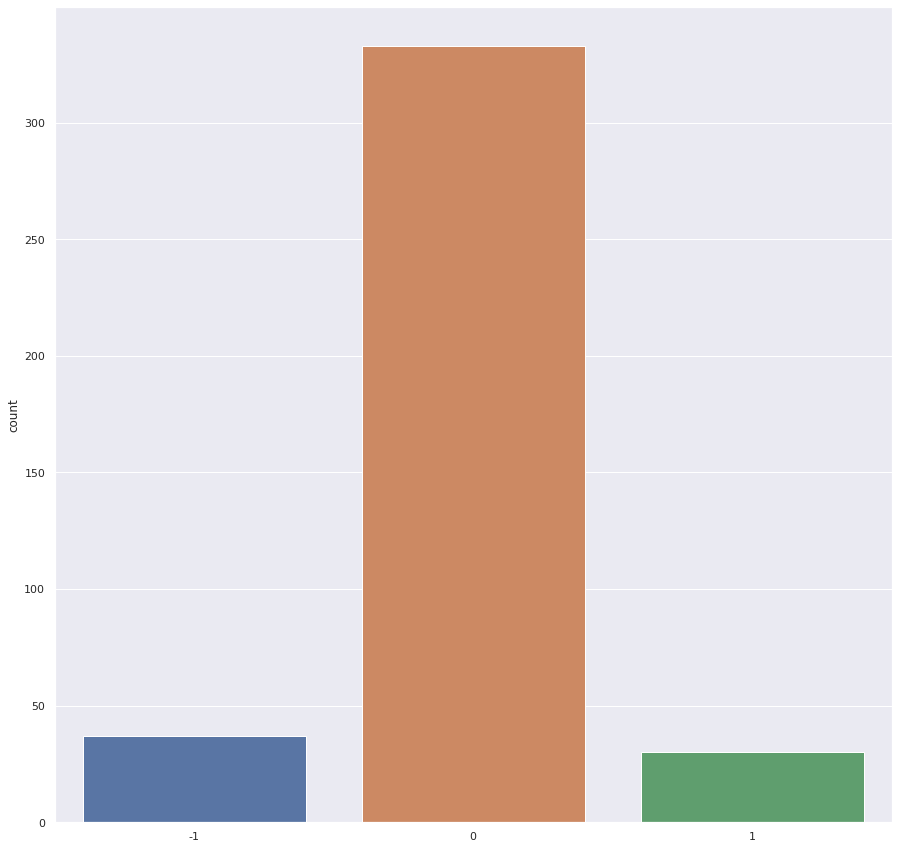

 
***********************************
 
GRADIENT BOOSTING CLASSIFIER
------------------------
Model performance for training set
Accuracy:  1.0000 
F1 score:  1.0000 
Precision:  1.0000 
Recall:  1.0000 
 
Confusion Matrix:
[[408   0   0   0]
 [  0 403   0   0]
 [  0   0 391   0]
 [  0   0   0 398]]


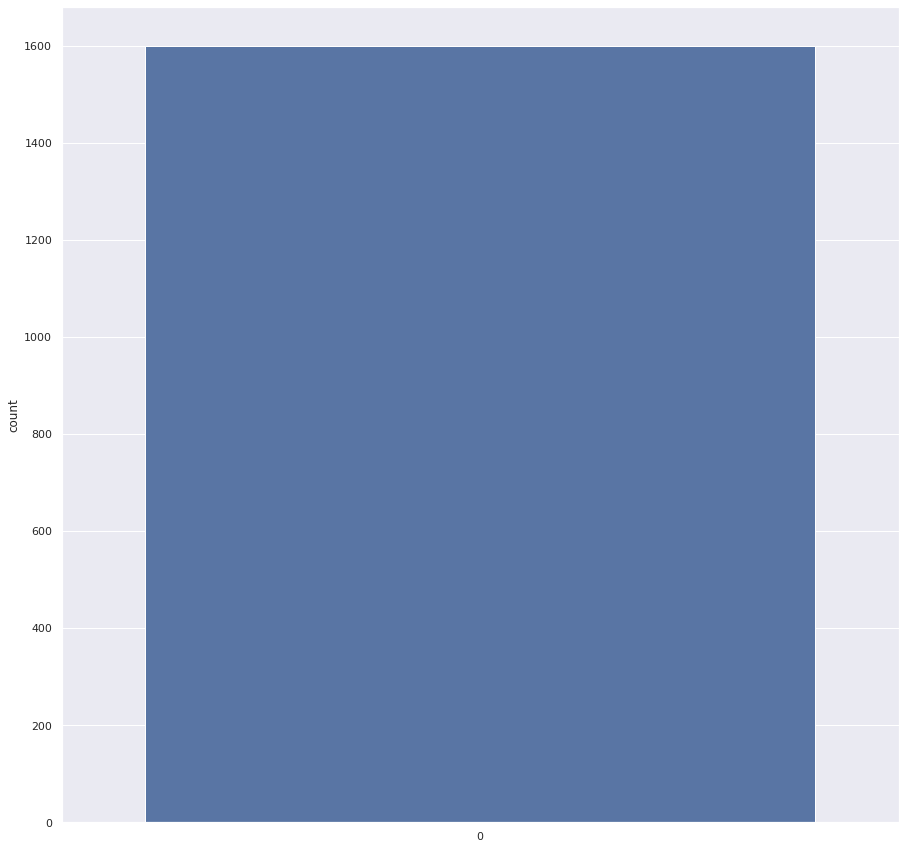

 
 
Model performance for test set
Accuracy:  0.9050 
F1 score:  0.9046 
Precision:  0.9067 
Recall:  0.9050 
 
Confusion Matrix:
[[87  5  0  0]
 [ 5 89  3  0]
 [ 0 12 89  8]
 [ 0  0  5 97]]


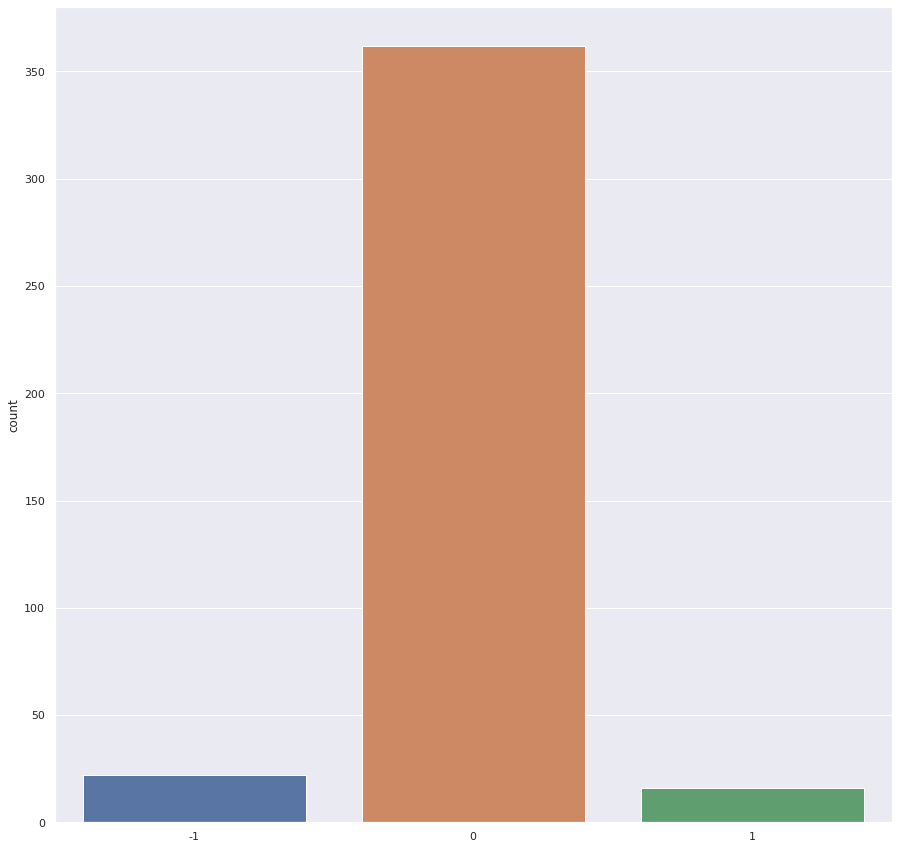

 
***********************************
 


In [35]:
models= { 
    'LOGISTIC REGRESSION' : LogisticRegression(),
    'DESCISION TREE' : DecisionTreeClassifier(),
    'RANDOMFOREST' : RandomForestClassifier(),
    'KNN CLASSIFIER': KNeighborsClassifier(),
    'NAIVE BAYES' : GaussianNB(),
    'SUPPORT VECTOR MACHINE': SVC(),
    'GRADIENT BOOSTING CLASSIFIER' :  GradientBoostingClassifier()
}



for i in range(len(list(models))) :
  model = list(models.values())[i]
  model.fit(X_train, Y_train)   # Train Model Fit

  # make prediction
  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)

  # Trainig set performance
  model_train_accuracy = accuracy_score(Y_train, Y_train_pred)  #Calculating accuracy score for train data
  model_train_f1 = f1_score(Y_train, Y_train_pred, average ='weighted') #Calculating f1 score for train data
  model_train_precision = precision_score(Y_train, Y_train_pred, average='weighted')  #Calculating precision score for train data
  model_train_recall = recall_score(Y_train, Y_train_pred, average='weighted')   #Calculating recall score for train data
  model_train_confusionmatrix = confusion_matrix(Y_train, Y_train_pred) #Calculating confusion matrix for train data

  # Test set performance
  model_test_accuracy = accuracy_score(Y_test, Y_test_pred) #Calculating accuracy score for test data
  model_test_f1 = f1_score(Y_test, Y_test_pred, average='weighted') #Calculating f1 score for test data
  model_test_precision = precision_score(Y_test, Y_test_pred, average='weighted') #Calculating precision score for test data
  model_test_recall = recall_score(Y_test, Y_test_pred, average='weighted') #Calculating recall score for train data
  model_test_confusionmatrix = confusion_matrix(Y_test, Y_test_pred) #Calculating confusion matrix for train data


  print(list(models.keys())[i])

  print('------------------------')

  print('Model performance for training set')
  print('Accuracy: {: .4f} '.format(model_train_accuracy))
  print('F1 score: {: .4f} '.format(model_train_f1))
  print('Precision: {: .4f} '.format(model_train_precision))
  print('Recall: {: .4f} '.format(model_train_recall))
  print(' ')
  print('Confusion Matrix:')
  print(model_train_confusionmatrix)
  plt.show(sns.countplot(list(Y_train_pred - Y_train)))
  print(' ')

  print('======================================')

  print(' ')
  print('Model performance for test set')
  print('Accuracy: {: .4f} '.format(model_test_accuracy))
  print('F1 score: {: .4f} '.format(model_test_f1))
  print('Precision: {: .4f} '.format(model_test_precision))
  print('Recall: {: .4f} '.format(model_test_recall))
  print(' ')
  print('Confusion Matrix:')
  print(model_test_confusionmatrix)
  plt.show(sns.countplot(list(Y_test_pred - Y_test)))
  print(' ')

  print('*'*35)
  print(' ')

In [ ]:
param_grid = { 
    'n_estimators': [50,100,500],
    'min_samples_split' = [50,100,150],
    'min_samples_leaf' = [40,50],
    'max_depth' : [5,8,15,None,10]
    }
rf_model = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_grid,
                       cv = 5, verbose=2, scoring='accuracy')
grid.fit(X_train,Y_train)
forest = grid.best_estimator_

rm_prediction=forest.predict(X_test)

print(grid.best_score_, grid.best_params_)



In [ ]:

best_model_test_accuracy = accuracy_score(Y_test, rm_prediction)
best_model_test_f1 = f1_score(Y_test, rm_prediction, average='weighted')
best_model_test_precision = precision_score(Y_test, rm_prediction, average='weighted')
best_model_test_recall = recall_score(Y_test, rm_prediction, average='weighted')
best_model_test_confusionmatrix = confusion_matrix(Y_test, rm_prediction)

print('Best Model performance for test set')
print('Accuracy: {: .4f} '.format(best_model_test_accuracy))
print('F1 score: {: .4f} '.format(best_model_test_f1))
print('Precision: {: .4f} '.format(best_model_test_precision))
print('Recall: {: .4f} '.format(best_model_test_recall))
print(' ')
print('Confusion Matrix:')
print(best_model_test_confusionmatrix)

# plt.show(sns.countplot(list(rm_prediction - Y_test)))



In [ ]:
gridgb = GridSearchCV(GradientBoostingClassifier(), param_grid )
gridgb.fit(X_train,Y_train)
forestgb = gridgb.best_estimator_

gb_prediction=forestgb.predict(X_test)

print(gridgb.best_score_, gridgb.best_params_)

In [ ]:
gb_model_test_accuracy = accuracy_score(Y_test, gb_prediction)
gb_model_test_f1 = f1_score(Y_test, gb_prediction, average='weighted')
gb_model_test_precision = precision_score(Y_test, gb_prediction, average='weighted')
gb_model_test_recall = recall_score(Y_test, gb_prediction, average='weighted')
gb_model_test_confusionmatrix = confusion_matrix(Y_test, gb_prediction)

print('Best Model performance for test set')
print('Accuracy: {: .4f} '.format(gb_model_test_accuracy))
print('F1 score: {: .4f} '.format(gb_model_test_f1))
print('Precision: {: .4f} '.format(gb_model_test_precision))
print('Recall: {: .4f} '.format(gb_model_test_recall))
print(' ')
print('Confusion Matrix:')
print(gb_model_test_confusionmatrix)